<a href="https://colab.research.google.com/github/lesi-nedo/AIF-project-24-25/blob/main/AIF_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group *Code Warriors v7.0* Project



## Introduction

**Authors**: Marco Dell'Acqua, Oleksiy Nedobiychuk

**Course Name**:  Artificial Intelligence Fundamentals 2024/2025


**Title**: Stochasticity in Action: Evaluating performance of Problog-Prolog and Monte Carlo Agents in Competitive Fighting Game.





---
***Disclaimer***: For our comparison, we used Simone Frassinelli's bot as a benchmark. This bot was created entirely by Simone during his previous exam session, and he kindly gave us permission to use it as a reference point for our experiments. We want to emphasize that we did not create or modify his work in any way.


This report compares three bot agents in a competitive fighting game environment. The trio is using different reasoning approaches to predict and estimate next actions:


*   Marco's bot is powered by Monte Carlo method, an adversarial searching algorithm, which chooses the best move beetween the possible moves according to the UCB1 formula.
*   Oleksiy's combines probability with logic using ProbLog, balancing clear decision making with uncertaintly. This hybrid approach helps the bot adapt to different fighting styles while maintaining consistent strategic goal, which is to inflict the most damage.
*   Simone's agent employs a Prolog-based logic programming approach to determine the optimal action in a given game state and subsequently executes that action



## Related Work

In the realm of gaming, we see a surge of intelligent agents employing cutting-edge techniques. Many of these agents leverage Reinforcement Learning (RL) algorithms, often combined with Neural Networks. For instance, Oh et al. (2019) showcase the power of RL and Neural Networks in creating game-playing agents. More recently, Li & Dig et al. (2024) explore Multi-Agent Reinforcement Learning (MARL) for benchmarking agent performance in competitive settings.

Beyond RL, there's also the potential of using purely Neural Network-based agents. Convolutional Neural Networks (CNNs), known for their prowess in image processing, can be trained to directly learn game strategies from raw pixel data. This approach has gained traction in games with complex visual environments, enabling agents to make decisions based on visual cues and patterns.

While probabilistic programming languages, particularly Prolog-based approaches, haven't been extensively explored in game AI, our probabilistic bot has yielded promising results. These findings indicate that such methods hold significant potential for developing effective game-playing agents in limited setting. While promising, this approach has a significant limitation: the inference time can grow exponentially with the complexity of the knowledge representation, making it impractical for larger problems.

For the Monte Carlo agent we wanted to obtain a particular behaviour: "*If the energy of my bot is high it must takes some distance, but if it is low it should be close to the opponent*"
<br> To do so, we have constructed the evaluation formula considering also the work of other partecipants of this competition.

The authors of these works considers, in particular, for the evaluation the damage dealt to the opponent [{1}](https://www.ice.ci.ritsumei.ac.jp/~ruck/PAP/cig2018-ishihara.pdf) [{2}](https://www.slideshare.net/slideshow/application-of-monte-carlo-tree-search-in-a-fighting-game-ai-gcce2016/68881168), computing the difference beetween the hp of the bot and the hp of the opponent. In another work the authors consider the *RushDown* approach (fight in close distance) and *Zoning* approach (fight keeping a certain distance)[{3}](https://www.ice.ci.ritsumei.ac.jp/~ruck/PAP/cig2018-ishii.pdf). In our report we show a MonteCarlo Tree Search algorithm that try to consider those two possibilities together.

## Methodologies

### The Undefeated Problog Agent

ProbLog employs a technique called Sentential Decision Diagrams (SDDs) (on `linux` based system) to evaluate the rules that guide the bot's actions. These rules are stored in a separate file (`.pl`) and are constantly updated with the current and previous game state during runtime.
These updates include position, hit-boxes, actions, energy levels and health levels for both players, which are used as facts in the KB grounding process.

The SDD is evaluated multiple times to get a tuple of predicted actions-utilities and their probability, then we randomly chose the best action weighed by the sum of their probability and utility score. While there is an element of randomness in the final action selection, the use of probability and utility scores ensures that the bot's choices are not purely arbitrary. The bot strategically favors actions with a higher likelihood of success and a greater potential reward.
However, the agent will tend to select the action that, or inflicts most damage or downs the opponent. This aggressive tendency can be both a strength and a weakness. While it often leads to decisive victories, it also makes the bot more vulnerable to counterattacks or risky strategies from the opponent.


Next action prediction is based on three main pillars:


1.   **Opponent Action Type Prediction**. This step focuses on figuring out the general type of action the opponent is likely to take next. By carefully considering the opponent's current energy, position, and state, as well as our agent's own position, we can estimate the probabilities of different action categories: `non_attack`, `attack`, `special`, and `movement`. For instance, if the opponent has low energy, the probability of `special` attack will be lower. Similarly, the distance between the agents influences the likelihood of `movement` or `attack` actions.
2.   **Strategic Action Selection - Finding the Top k Moves**: Instead of considering all possible actions, our agent cleverly narrows down the choices to the top k most promising moves. This strategic selection is essential for keeping the decision-making process efficient and preventing exponential inference time. After experimenting with different values, we settled on a `k` value of 3. This choice struck a good balance between speed and effectiveness, giving our bot a competitive edge without sacrificing responsiveness. While larger `k` values were explored, they hindered performance and came at the cost of increased inference time and `k` less than 3 were too restrictive. The **Assesment** section focuses on the results obtained with k = 3. For a more comprehensive analysis, including experiments with k = 2 and k = 4, please refer to the project's [github](!https://github.com/lesi-nedo/AIF-project-24-25) code repository.\
\
The logic behind action picking is the categorization of latter into four primary types: `movement`, `defensive`, `attack` and `special`. We assigned fixed probabilities to each action within these categories, carefully considering their effectiveness in disrupting the opponent's strategy and maximizing damage output. Our algorithm begins by carefully assessing the current game state, taking into account factors such as the distance between players, their health and energy levels, their positions on the stage, and the overall control of the stage. This assessment is performed by the `evaluate_state` function, which produces a numerical score reflecting the favorability of the situation for our agent. This score plays a crucial role in guiding the subsequent decision-making process. If the score is particularly low, indicating a disadvantageous situation, the agent might prioritize defensive actions or those aimed at improving its position.\
\
Subsequently, the algorithm evaluates the potential effectiveness of each available action, primarily focusing on their damage-inflicting capabilities. However, there is one exception: the 'super special' action, due to its high impact, is always considered regardless of other factors. The functions `compute_helper` and `get_action_weight`s work in tandem to estimate the effectiveness of each action and assign corresponding weights. These weights are determined by considering various factors: the potential damage of the action, the current state score, the predicted action type of the opponent, and the historical success rate of the action in similar situations.\
In an attempt to enhance the bot's adaptability, we investigated the potential of incorporating counteractive actions into its decision-making process. This strategy involved analyzing the outcomes of previous aggressive actions performed by both  agent, our and the opponent. We hypothesized that if our agent's attack failed to inflict damage due to an interfering action from the opponent (e.g., a block or dodge), this opponent's action could be considered a potential counter to our attack, or vice versa. By identifying such counteractive actions, we aimed to equip the bot with the ability to respond more effectively to the opponent's defensive maneuvers.\
\
However, the inclusion of this counteractive strategy proved detrimental to the bot's overall performance. Experimental results indicated a decrease in the agent's winning rate when employing this approach. Consequently, we made the decision to discard this strategy from the final version of our bot.

3.  **Final Action Utility Calucation**: The action utility clause assigns a utility score to each of the top `k` actions. This score is then incorporated into the probabilities generated by the ProbLog inference mechanism, facilitating a weighted random selection of the optimal action. The utility score calculation takes into account several crucial factors, including:

  - **Current Game State**: The current positions, health, and energy levels of both the agent. These parameters provide a snapshot of the immediate tactical situation.
  - **Agents State**: By integrating the predicted state of the opponent, and our agent state, the utility score incorporates an element of strategic anticipation. This allows the agent to prioritize actions that are more likely to be effective given the opponent's anticipated condition.
  - **Inter-Agent Distance**: The distance between the agent and the opponent is another key consideration. This spatial information informs the selection of actions that are appropriate for the current engagement range, such as close-range attacks or ranged maneuvers.

  The final score is computed by including:
    - **Damage Ratio**: The potential damage of the attack action
    - **Energy Ratio**: The balance between energy gain and cost for performing attack action.
    - **Distance Multiplier**: Adjustments based on the distance between the our agent and the opponent. Computed for aggressive and non actions.
    - **State Multiplier**: Adjustments for attack action based on the predicted opponent state.


In the final stage of decision-making, our agent aggregates a set of the most promising predicted actions. Subsequently, it extracts the associated utility and probability for each of these actions. The ultimate action selection is performed through a weighted random process, where the probability of choosing an action is biased by the sum of its utility and probability scores. This approach ensures that actions with higher combined scores are more likely to be selected, while still allowing for a degree of exploration.

### Monte Carlo Tree Search Agent


For the Monte Carlo agent we used a function from the module *monte-carlo-tree-search*. In order to use the algorithm provided by this module, we have created a file, called *FighterState.py* in which we have created 2 classes *FighterState*, which is the state used for the algorithm to decide the best move, and *Action* which is the action that our model can do during the simulation. The class *FighterState* contains some functions useful for the algorithm:

*   get_possible_actions(self): this function is used to obtain a list of possible actions used to create and evaluate the new states during the algorithm
*   take_action(self, action): this is the core of the class, because in this function we create the new state and we apply the changes to this new state according to the action chosen randomly by the algorithm. At the end of this function, is important to swap the current player, this is because the algorithm is an adversarial algorithm.

*   is_terminal(self): this function is used by the mcts algorithm to determine if the current node is a leaf node or not.
*   get_reward(self): this function is used to get the evaluation used for the UCB1 algorithm.

<br> For the evaluation of the model we focused in particular on the results and scores obtained by different configurations, in order to choose the best possible configuration and of course determine if the behaviour of our model could win against different opponents, in particular, against the developer's monte carlo agent. <br> For this model, in order to simply the work for defining the behaviour we choose to not consider the guard as an advantage, obtaining in this way a more aggressive agent.

## Assessment

### Marco's Agent Vs Oleksiy's Agent Results



In [ ]:
import os

if not os.path.exists('AIF-project-24-25'):
    !git clone https://github.com/lesi-nedo/AIF-project-24-25.git

%cd AIF-project-24-25

Cloning into 'AIF-project-24-25'...
remote: Enumerating objects: 5095, done.
remote: Counting objects: 100% (682/682), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 5095 (delta 618), reused 608 (delta 555), pack-reused 4413 (from 2)
Receiving objects: 100% (5095/5095), 136.95 MiB | 22.14 MiB/s, done.
Resolving deltas: 100% (1349/1349), done.
Updating files: 100% (6619/6619), done.
/content/AIF-project-24-25/AIF-project-24-25/AIF-project-24-25/AIF-project-24-25


Win Rate: 100.00%
Loss Rate: 0.00%


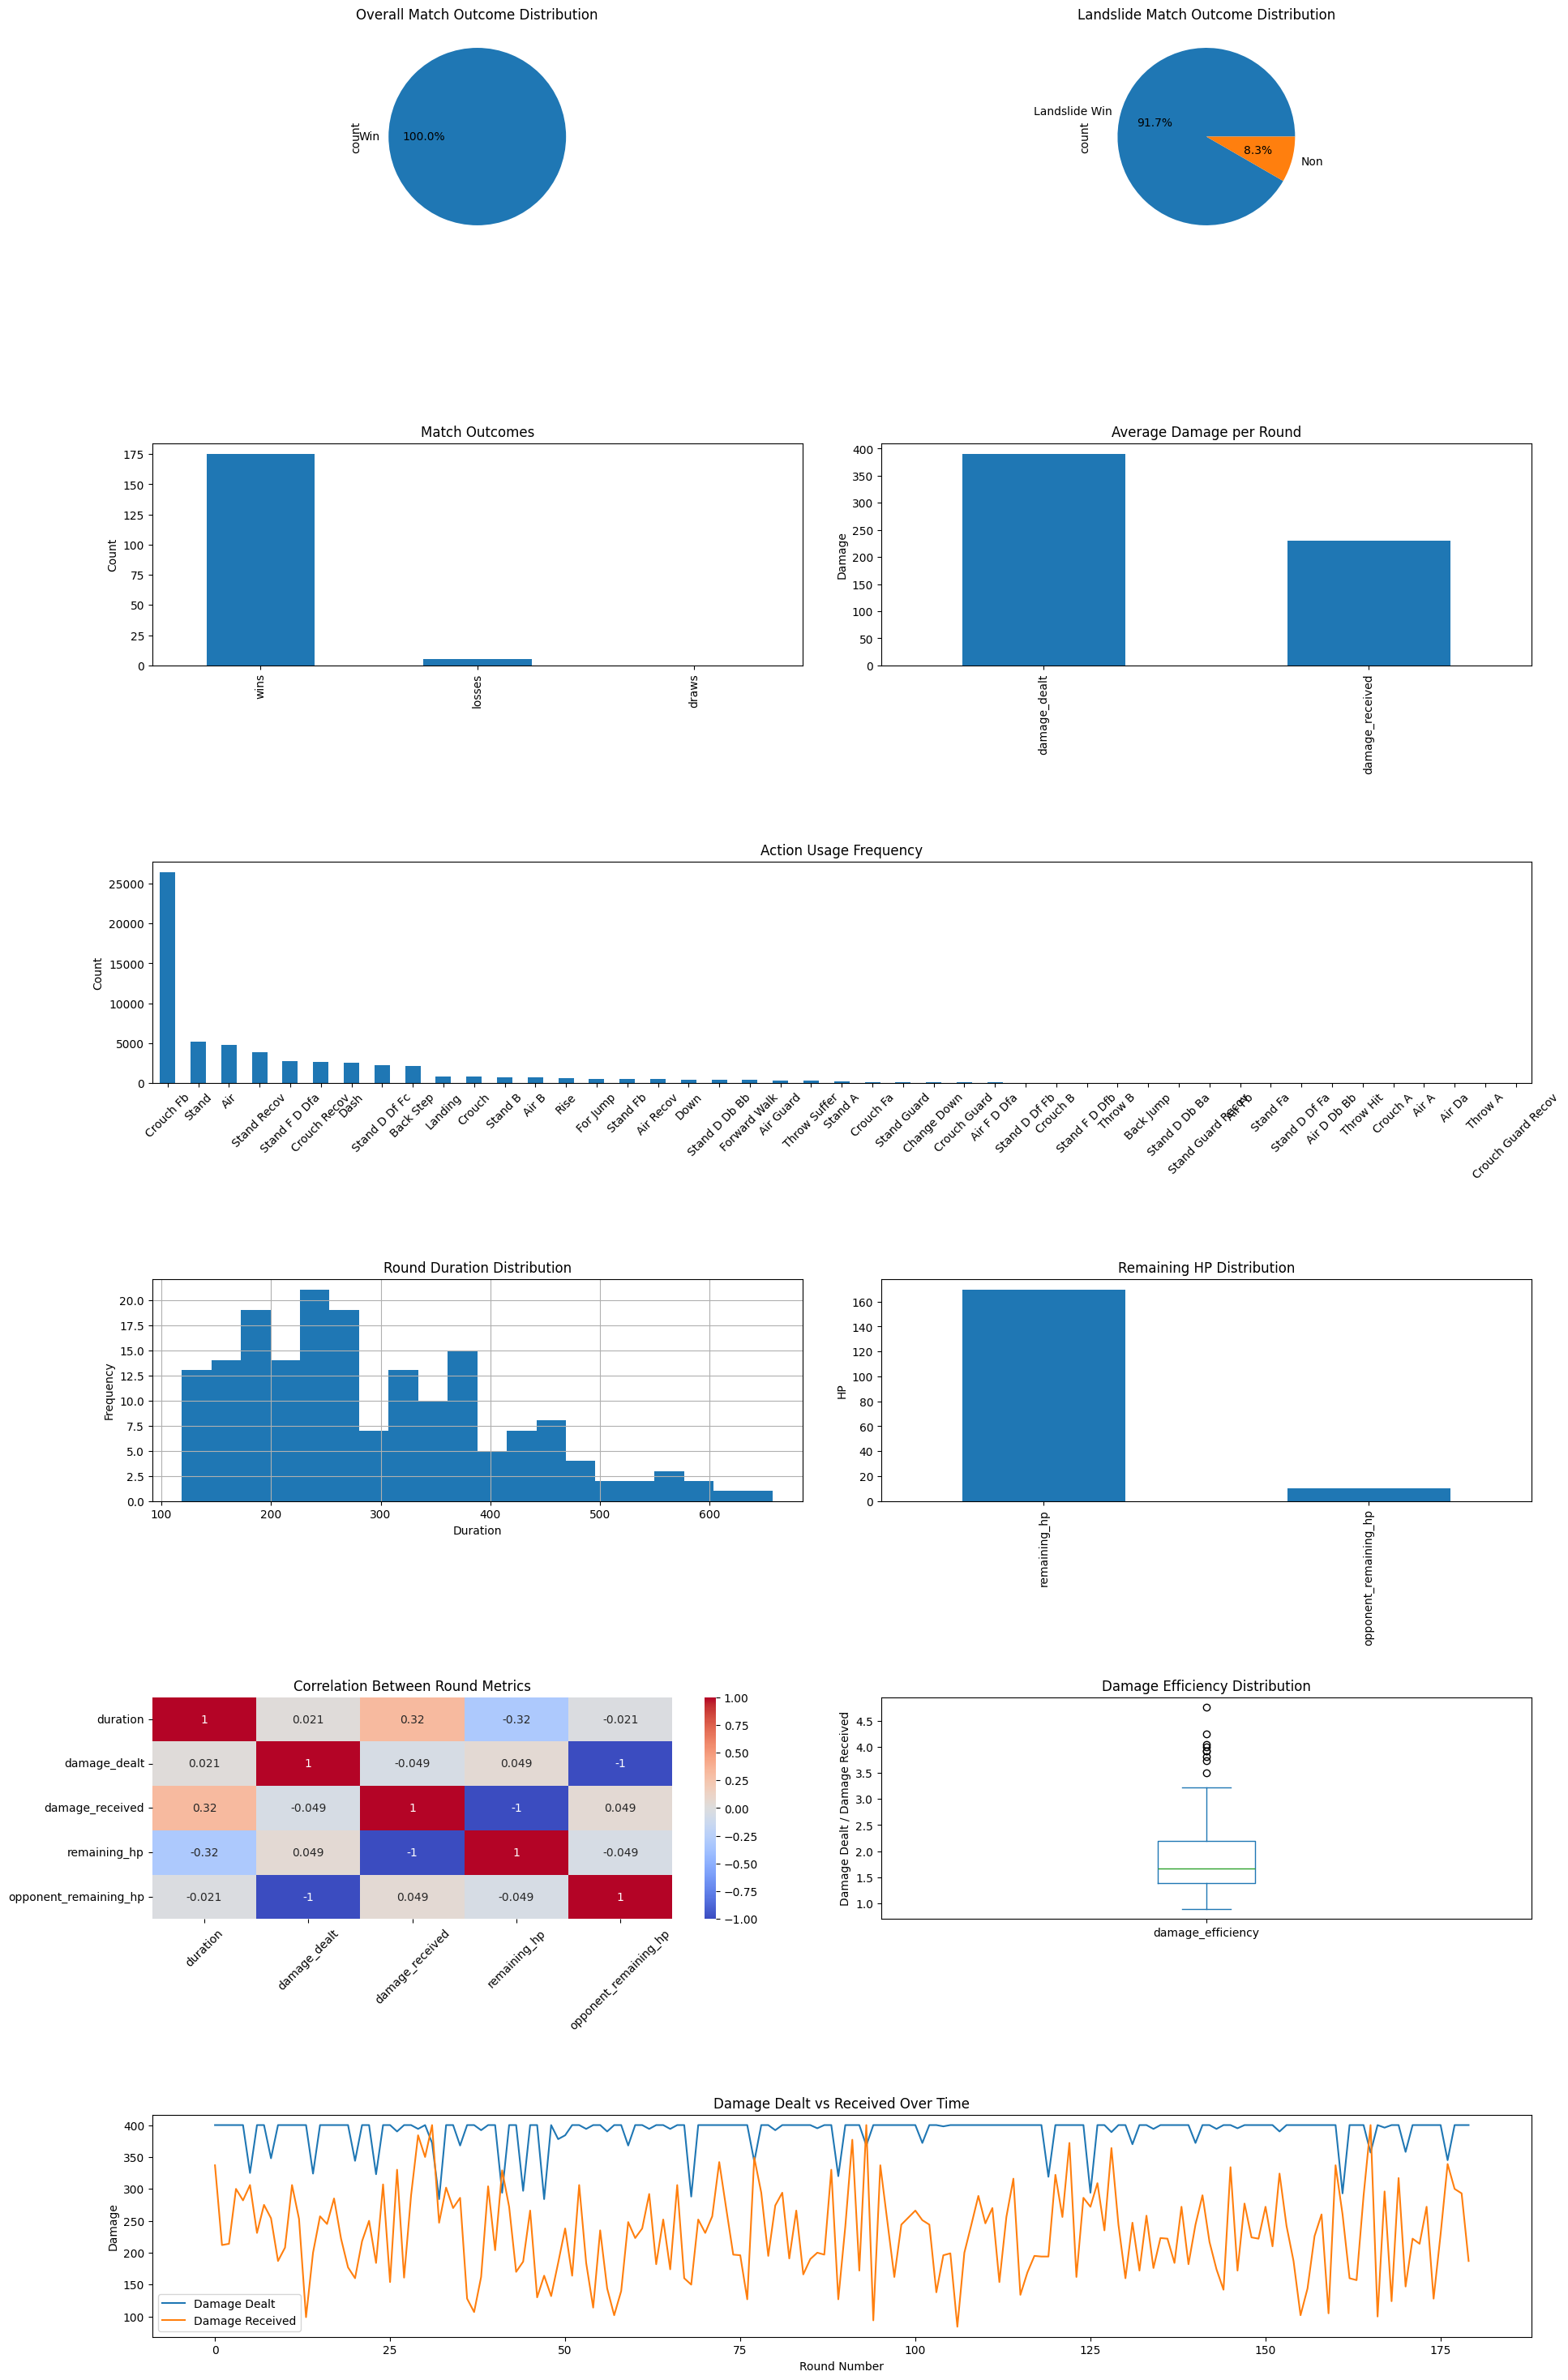

In [ ]:


from problog_agent.analyse import analyse, analyze_inference_and_actions

analyse('problog_agent/stats_k=3/MctsAi-vs-ProblogAgent/match-*.json')


#### **Analysis of Agent Performance**

ProbLog agent achieved a 100% win rate in overall matches (first pie chart), in 93.3% of matches it won all three rounds (second pie char).

ProBlog agent on average dealt significantly more demage (-375) compared to Marco's MCTS agent (≈220) (Forth plot).

The box plot show a ratio the distribution of the ratio between damage dealt and damage received by the agent. A majority of the observed values fall within the range of 1.5 to 2.5, indicating a consistent trend of the agent inflicting more damage than it sustains. However, the presence of outliers extending up to 4.0 signifies instances where the agent achieved a considerably higher damage output compared to the damage it received.

The most frequently used action appears over 20,000 times. These results suggest the emergence of a dominant strategy employed by the agent. However, further investigation is warranted to assess the robustness of this strategy and to explore potential counter-strategies that could potentially mitigate its effectiveness.

The line graph presented below depicts the cumulative damage dealt and received by the ProbLog agent over the course of a match. Notably, the blue line, representing damage dealt, consistently surpasses the orange line, which represents damage received. This observation underscores the superior performance of the ProbLog agent, highlighting its tendency to inflict greater damage than it sustains. The data further suggests that, in a majority of scenarios, the ProbLog agent concludes the game by successfully defeating the opponent. While the blue line demonstrates a relatively steady upward trend, intermittent spikes are observed in the orange line. These spikes correspond to instances where the ProbLog agent was subjected to a 'super special' attack from the opponent, resulting in significant damage intake. Based on this analysis, future refinements to the agent's strategy could prioritize enhancing its ability to evade or mitigate the impact of these high-damage attacks. Such improvements could involve incorporating more sophisticated defensive maneuvers, predictive movement patterns, or counter-attack strategies specifically designed to neutralize the threat posed by the *super special*
 ability.

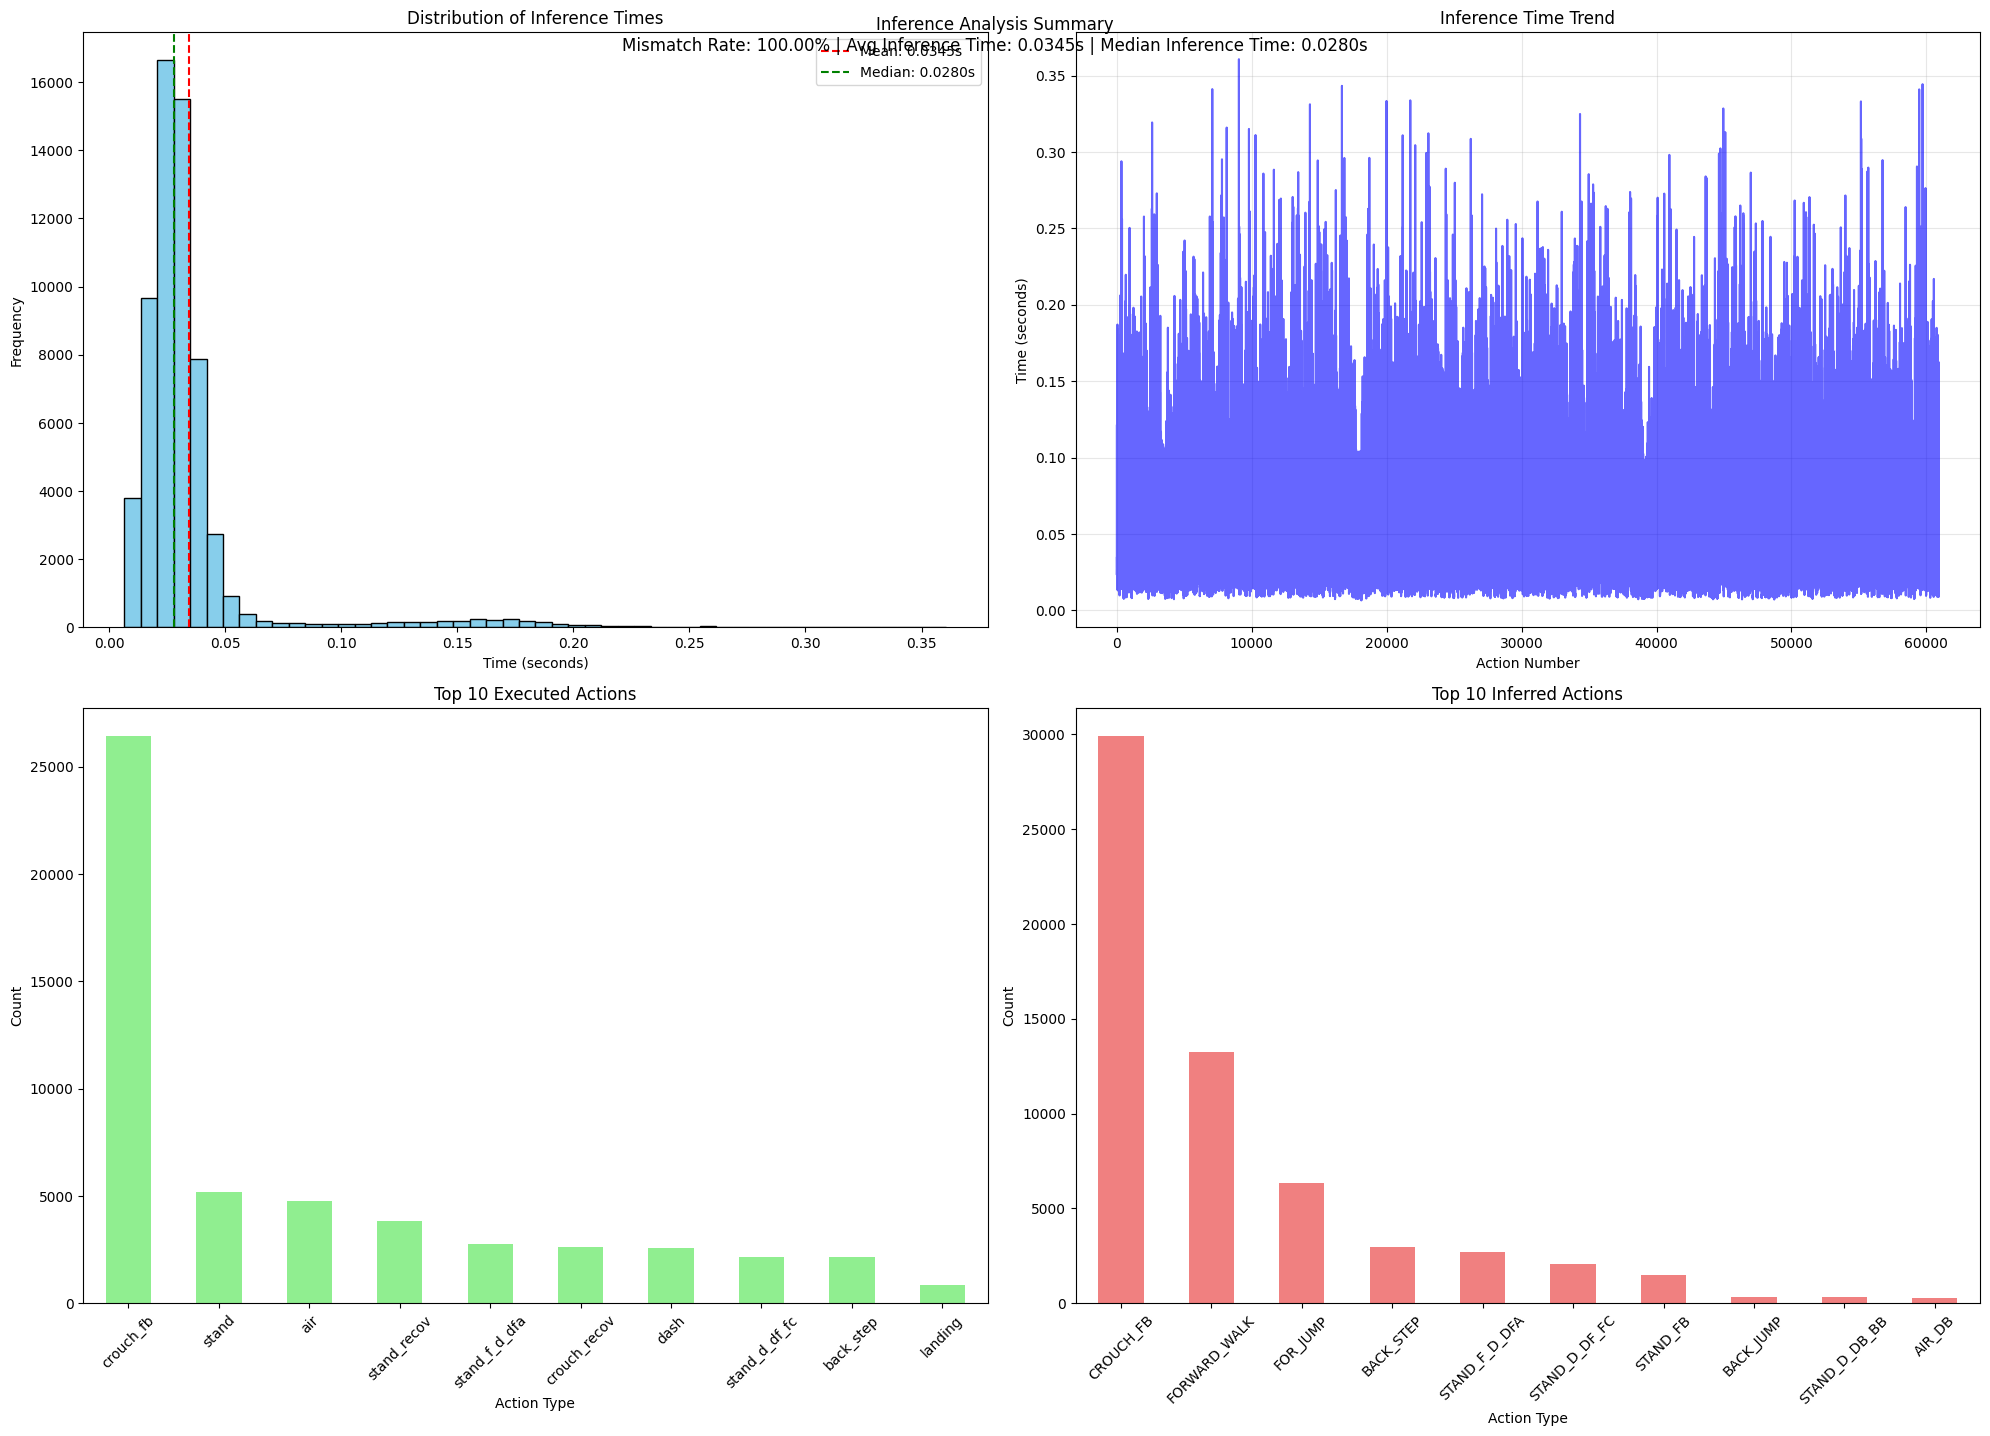


Detailed Statistics:
Action Mismatch Rate: 100.00%
Average Inference Time: 0.0345 seconds
Median Inference Time: 0.0280 seconds
Total Actions Analyzed: 60929


In [ ]:
analyze_inference_and_actions('prolog_based/problog_agent_ole/stats_k=3/MctsAi-vs-ProblogAgent/match-*.json')


A significant portion of our development efforts was dedicated to refining the inference mechanism of our agent. This optimization aimed to ensure swift and effective action selection during gameplay. An analysis of the inference time distribution (first plot) reveals that the majority of decisions were made promptly, boasting a median inference time of 0.028 seconds and an average of 0.0345 seconds.

The time series (second plot) displays approximately 60,000 actions. Notably, it did not indicates any signs of performance degradation over time, suggesting a robust and stable inference process. While occasional spikes in inference time are observed, they appear at regular intervals and are not substantial enough to significantly impact the agent's overall responsiveness. While spikes in inference time are not dominant, it would be beneficial to explore their cause and their impact on specific gameplay.

A mismatch analysis of the actions inferred and executed might suggest a high discrepancy. However, this disparity is primarily attributed to actions with functional equivalence but distinct labels within the game environment. For instance, 'DASH' and 'FORWARD_WALK', while semantically different, effectively represent the same movement. A similar overlap exists between 'AIR' and 'FOR_JUMP'. Furthermore, it is important to acknowledge the inherent recovery period following a successful hit on the agent. This recovery state temporarily restricts the range of actionable moves, influencing the accuracy of action predictions. Finally, the asynchronous nature of the game loop leads to multiple predictions for a single action prior to its actual execution. Despite these contributing factors, it is crucial to emphasize that all predicted actions are ultimately carried out by the agent, demonstrating a fundamental alignment between prediction and behavior.

### Game Default Agent Vs Oleksiy's Agent Results (Based on MCTS)

Win Rate: 98.33%
Loss Rate: 0.00%


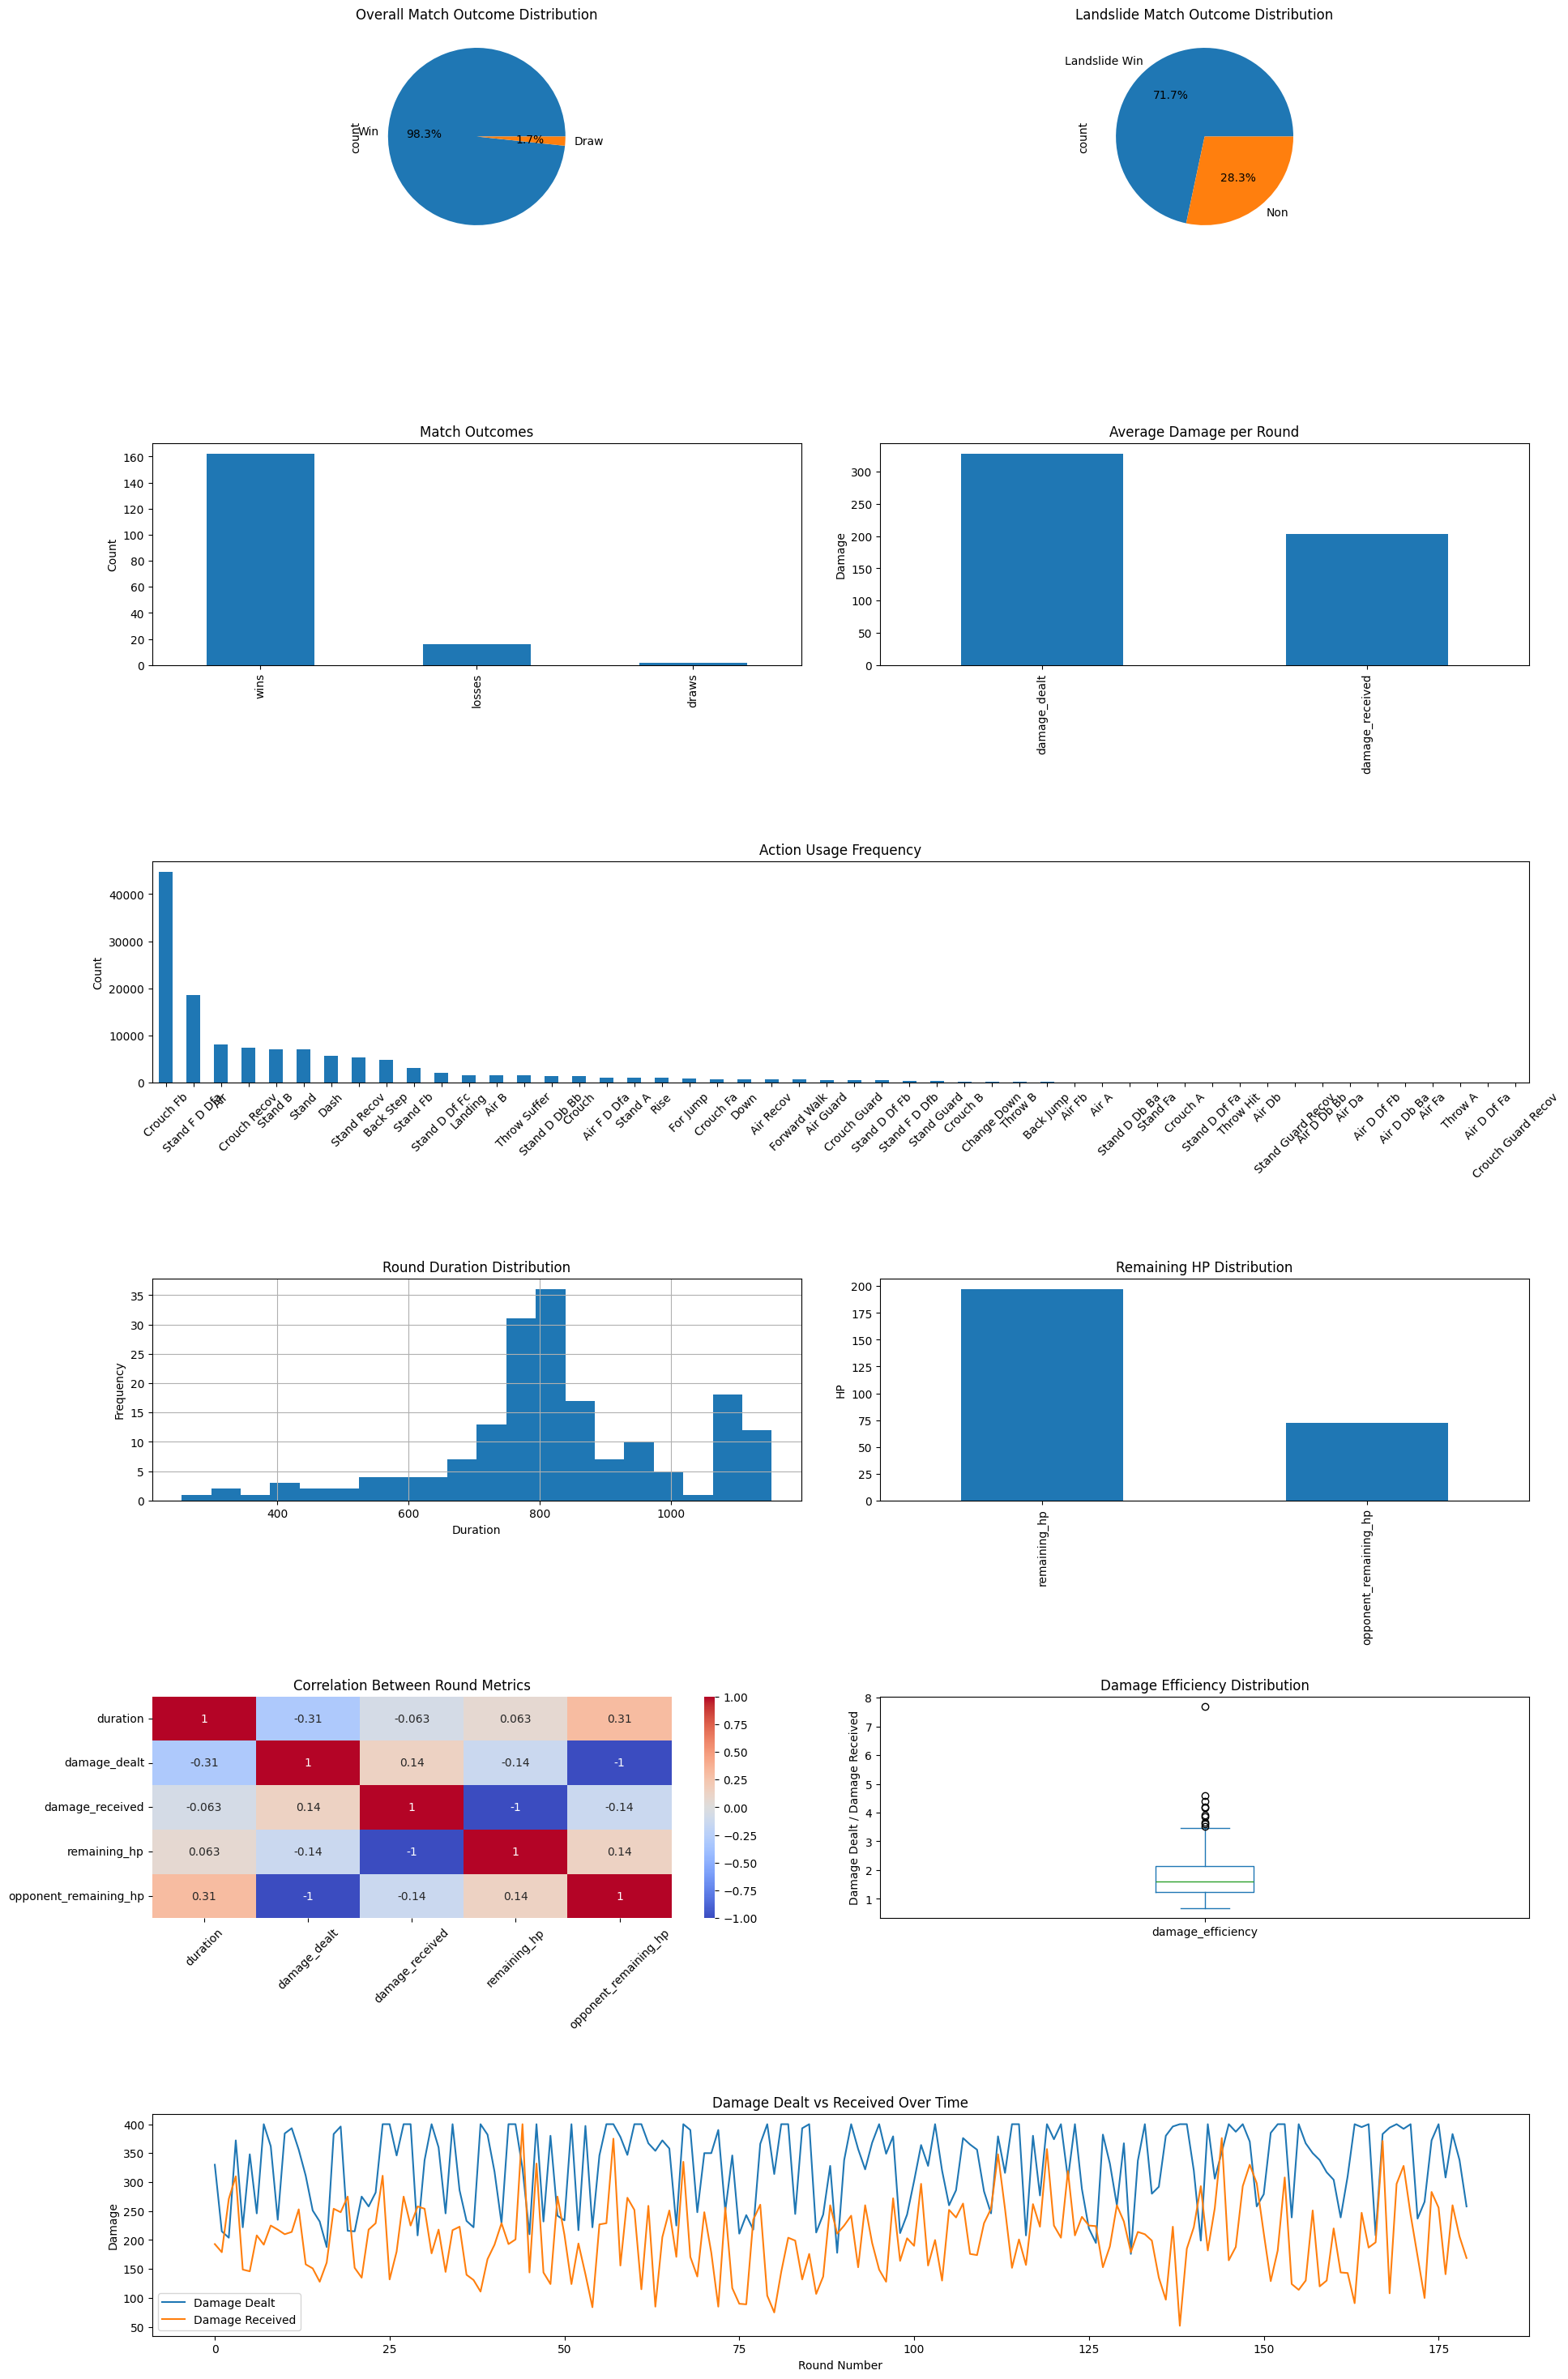

In [ ]:
analyse('prolog_based/problog_agent_ole/stats_k=3/MctsAi23i-vs-ProblogAgent/match-*.json')


**Analysis of Agent Performance**

The ProbLog agent demonstrated remarkable effectiveness again, winning 98.3% of all matches, with 71.7% being landslide victories (winning all three rounds). This represents a significant but not complete dominance over the game MCTS opponent.

In comparative assessments against Marco's agent, the game's default agent exhibited superior performance across multiple metrics. Notably, the default agent consistently inflicted higher damage, secured a greater number of match victories, and presented a more formidable challenge to our agent.

Combat metrics show the ProbLog agent dealt approximately 300 units of damage per round, while the MCTS agent averaged around 200 units. The damage efficiency distribution (boxplot) reveals that most exchanges resulted in a damage ratio between 1.5 and 2.0, with some exceptional rounds reaching up to 7.0, indicating moments of particularly effective combat performance.
Action usage analysis reveals a highly skewed distribution, with the most frequent action being executed over 40,000 times same as with Marco's, followed by a sharp decline in usage for other moves. This suggests that the action `CROUCH_FB` is the most efficient to inflict damage, gain energy and win the games.

The round duration histogram shows an interesting bimodal distribution centered around 800 and 1000 time units, suggesting two distinct types of round conclusions: quick victories and more prolonged exchanges.

The temporal damage analysis (bottom graph) reveals dynamic combat patterns where the ProbLog agent (blue line) consistently maintained higher damage output compared to damage received (orange line). Notable fluctuations in both lines suggest active exchanges rather than one-sided dominance, though the ProbLog agent maintained tactical superiority throughout most encounters. Furthermore, the plot indicates the occurrence of rounds characterized by minimal damage inflicted by both agents. This observation suggests a potential pattern of cautious or avoidant behavior.



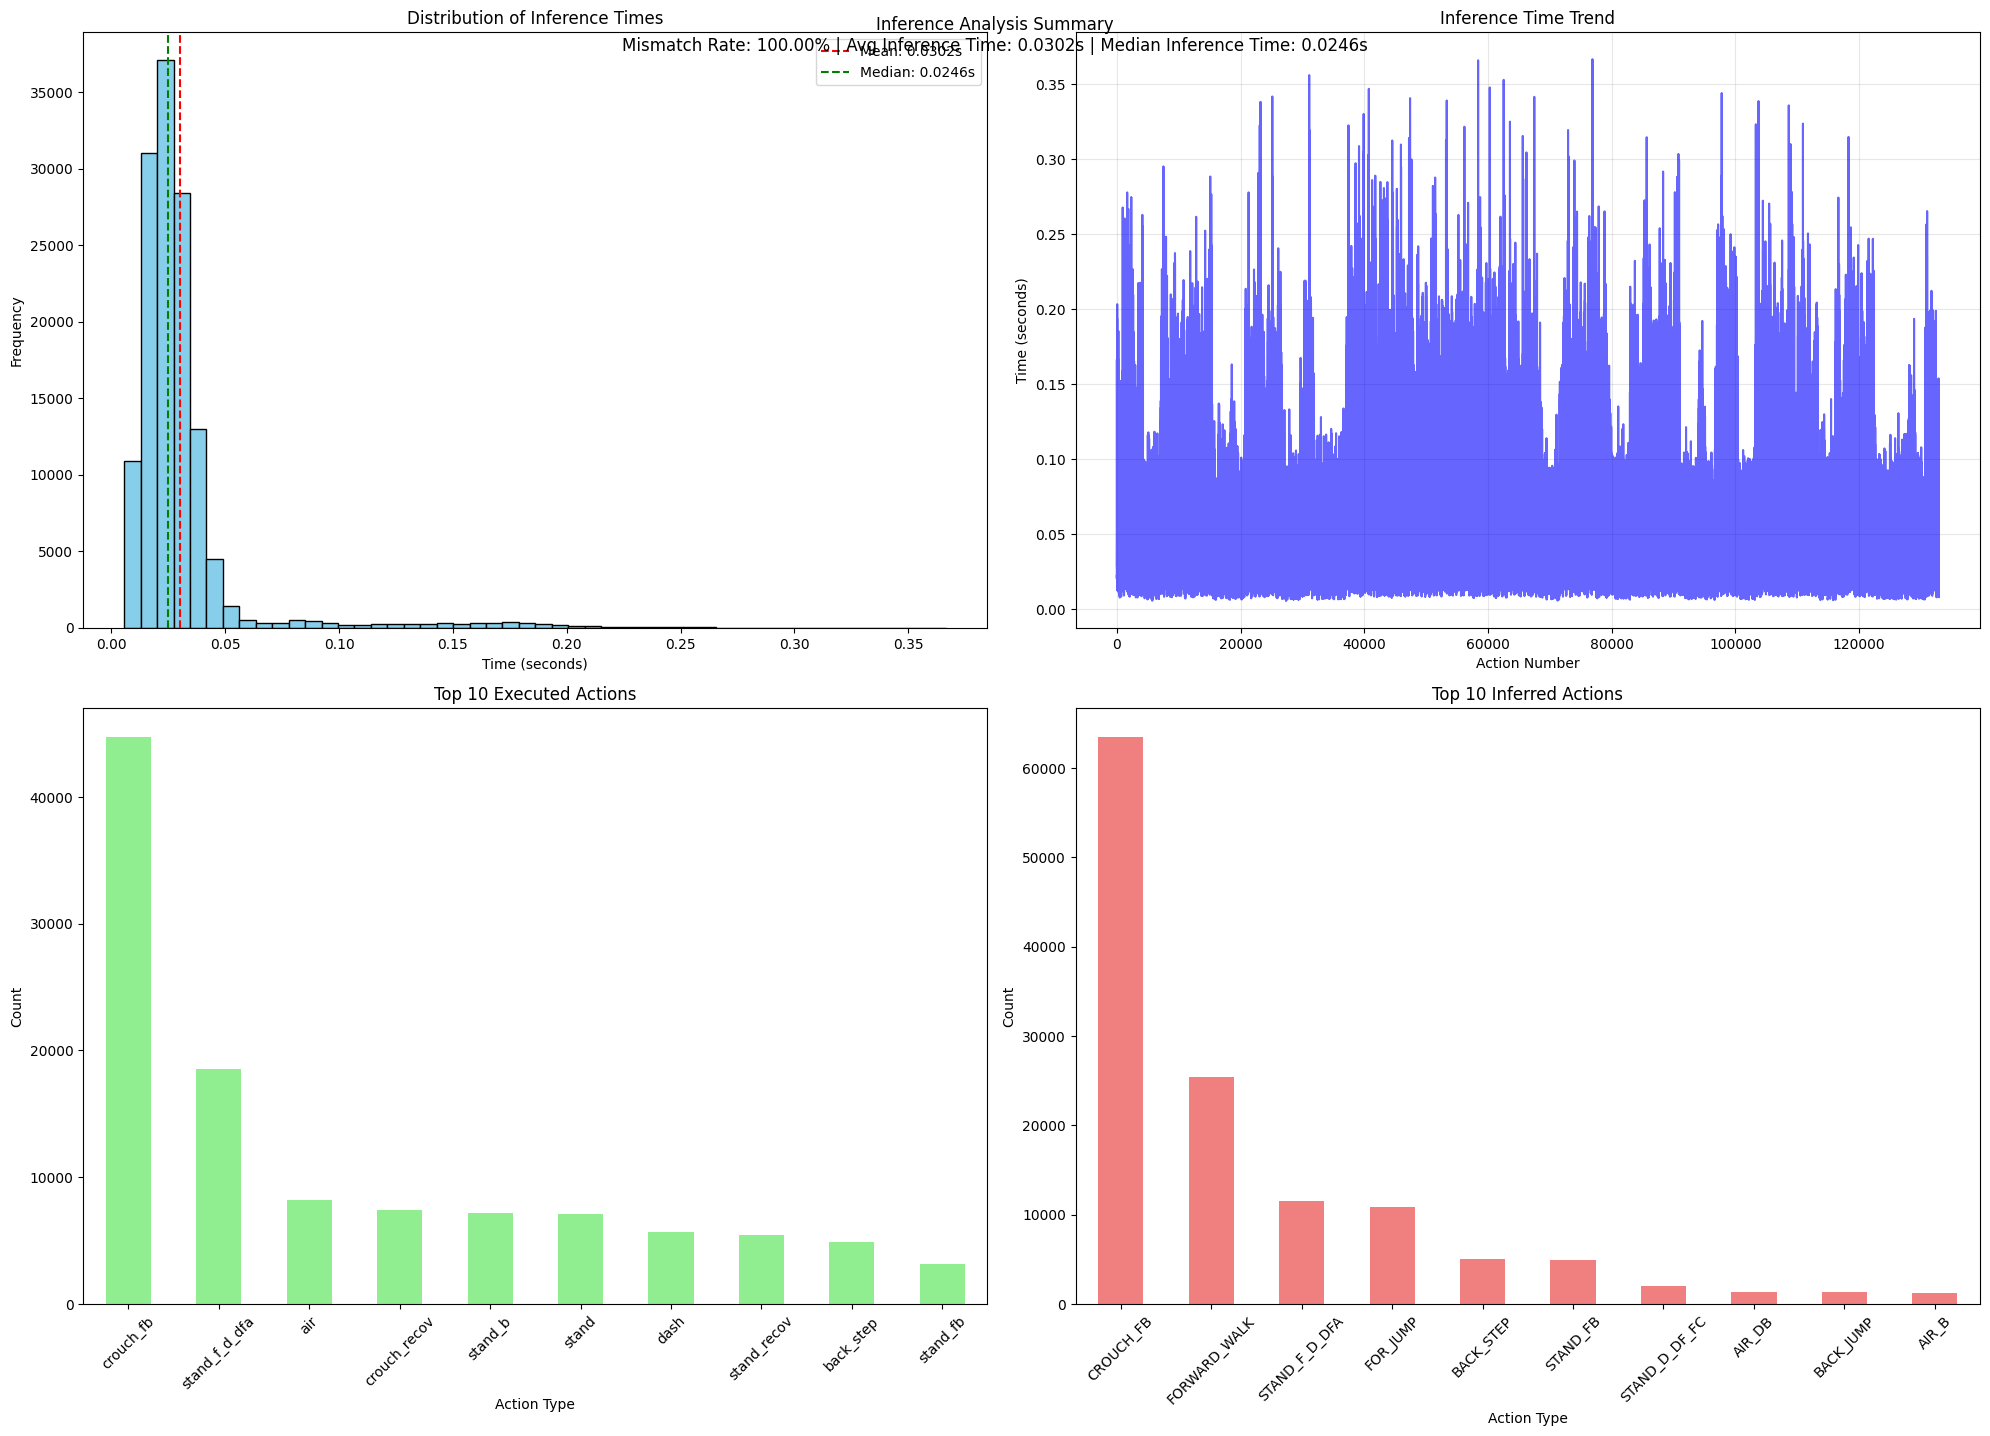


Detailed Statistics:
Action Mismatch Rate: 100.00%
Average Inference Time: 0.0302 seconds
Median Inference Time: 0.0246 seconds
Total Actions Analyzed: 132878


In [ ]:
analyze_inference_and_actions('prolog_based/problog_agent_ole/stats_k=3/MctsAi23i-vs-ProblogAgent/match-*.json')

The inference time distribution (first plot) demonstrates highly efficient decision-making, with a median inference time of 0.0246 seconds and an average of 0.0302 seconds, showing slightly better performance than against the Marco's agent.

The time series (second plot) encloses approximately 120,000 actions, double the scale of our previous results. The temporal pattern exhibits consistent performance throughout extended gameplay sessions, with no significant degradation in response times, again. While the plot shows periodic spikes reaching up to 0.35 seconds, these represent a smaller fraction than the previous plot  of total actions and don't substantially impact overall agent responsiveness.

The action analysis reveals interesting patterns in both inferred and executed moves. The executed actions (green plot) show "CROUCH_FB" as the dominant strategy with over 40,000 executions, while the inferred actions (red plot) show an even stronger preference for this move with approximately 60,000 inferences. This behaviour is consistent throughout multiple agents. A comparative analysis of inferred actions between matches involving Marco's agent and the game's default agent reveals the adaptive capacity of our bot to adjust its strategy based on the opponent's playing style. The FightingICE default agent exhibits a greater tendency toward aerial combat, frequently jumping and executing maneuvers in the air. In response, our agent demonstrates a corresponding increase in the selection of both aerial actions and anti-air countermeasures, indicating an adaptive response tailored to the opponent's preferred tactics.

During our evaluation, we observed a specific challenge in our agent's predictive capabilities. It exhibited difficulty in anticipating opponent jump actions, frequently selecting the 'CROUCH_FB' action, which is ineffective against airborne opponents. This limitation highlights an area for potential improvement in future iterations of the agent's decision-making logic.

### Simone's Agent Vs Oleksiy's Agent Results

Win Rate: 100.00%
Loss Rate: 0.00%


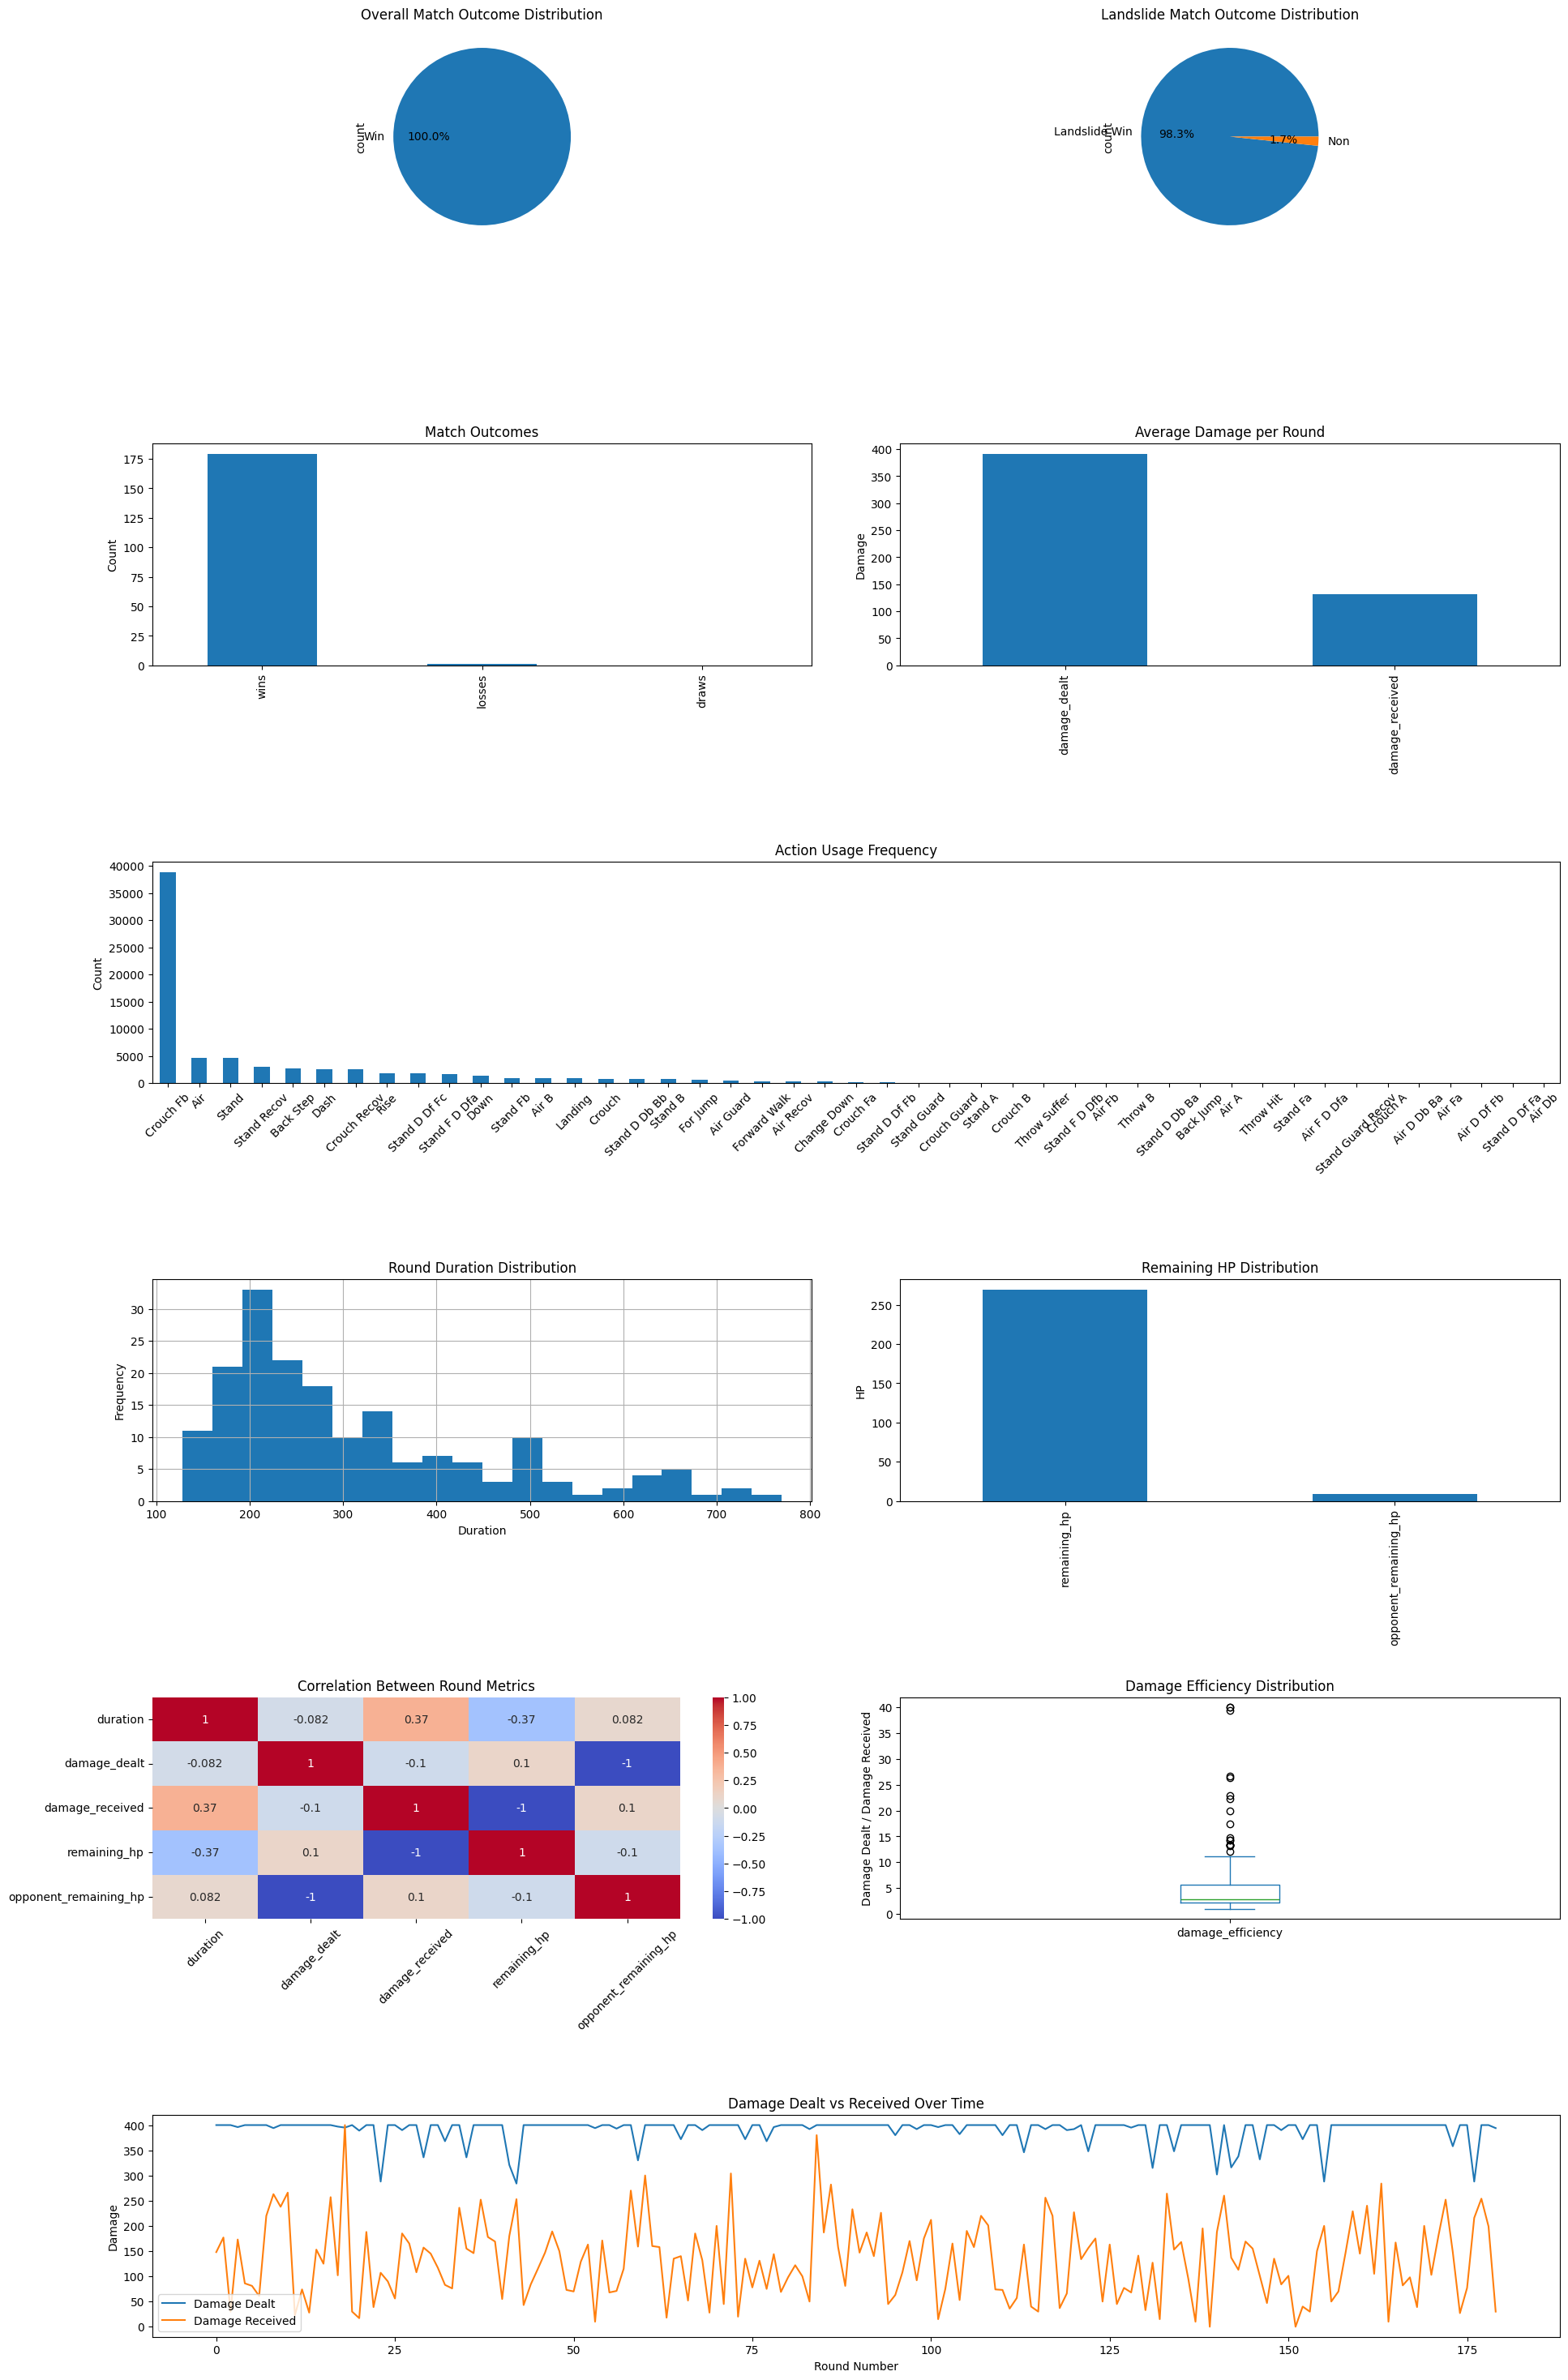

In [ ]:
analyse('prolog_based/problog_agent_ole/stats_k=3/PrologAI-vs-ProblogAgent/match-*.json')

**Analysis of Agent Performance**

The ProbLog agent demonstrated clear dominance over the Prolog-based agent, consistently achieving landslide victories in the majority of matches. The sole instances of defeat for the ProbLog agent were attributed to the challenge of evading the opponent's 'super special' attack. This observation underscores the potent threat posed by this specific maneuver.

A comprehensive analysis of performance metrics, including average damage per round, round duration distribution, and remaining HP distribution, further highlights the relative weakness of the Prolog agent. Notably, the ProbLog agent inflicted significantly higher average damage per round (approximately 375 units), while effectively preserving its own HP throughout the matches. In stark contrast, the Prolog agent managed to inflict only an average of 125 damage units. Moreover, the damage efficiency, as depicted in the box plot, reveals a remarkably high damage ratio for the ProbLog agent, typically ranging between 3 and 5 units, with occasional outliers reaching as high as 25 units. This exceptional damage efficiency underscores the ProbLog agent's superior ability to inflict damage while minimizing damage taken.

The damage over time graph shows  ProbLog agent (blue line) maintained steady high damage output around 350-400 units. Prolog agent (orange line) struggled to deal consistent damage, averaging much lower and showing high variability. However, Problog agent is vulnerable to special action, which can be mitigated by better predicting it and counteracting it with more effective actions.

The extremely high damage efficiency ratios suggest the ProbLog agent found optimal attack patterns that the Prolog agent struggled to counter, leading to very one-sided exchanges. This might indicate that probabilistic reasoning is better suited for the dynamic, uncertain environment of fighting games compared to traditional logical programming approaches.

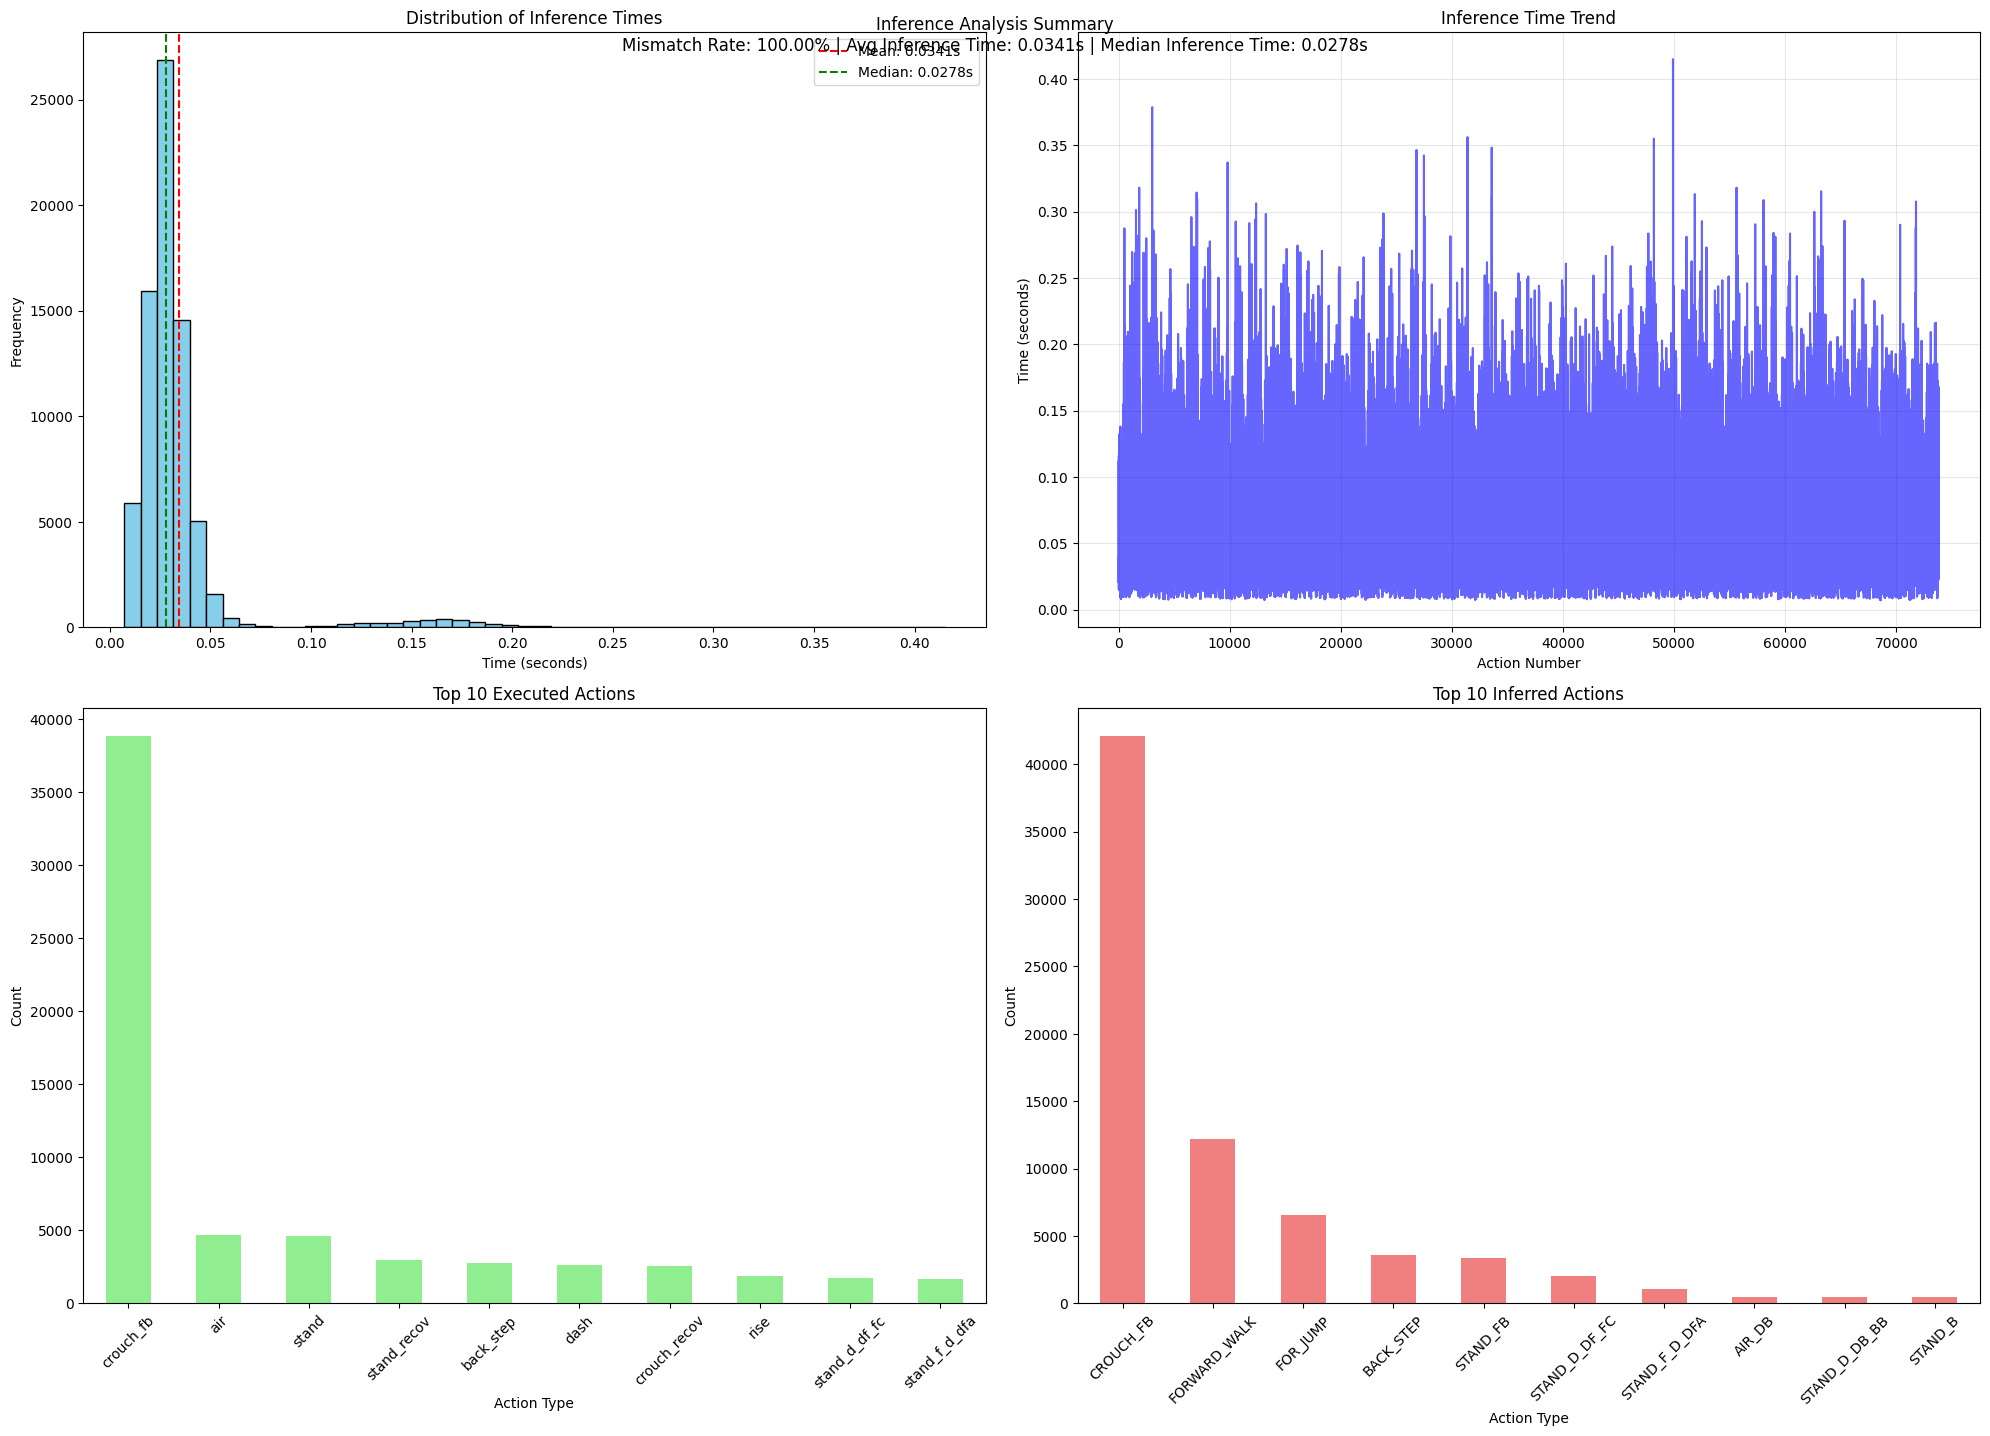


Detailed Statistics:
Action Mismatch Rate: 100.00%
Average Inference Time: 0.0341 seconds
Median Inference Time: 0.0278 seconds
Total Actions Analyzed: 73835


In [ ]:
analyze_inference_and_actions('prolog_based/problog_agent_ole/stats_k=3/PrologAI-vs-ProblogAgent/match-*.json')

In this experiment, the median inference time was observed to be 0.0278 seconds, representing a marginal increase compared to the preceding experiment. The total number of actions executed was approximately 70,000, a reduction attributed to the shorter duration of the rounds in this scenario.

Analysis of both executed and inferred actions consistently reveals 'CROUCH_FB' as the prevailing strategy. However, variations in the frequency of specific actions across different experiments suggest the ProbLog agent's ability to adapt its tactical approach in response to the opponent's playing style. This adaptability could be a key factor contributing to the agent's overall success.

### Monte Carlo Agent

---



In order to use the Monte Carlo Tree search for our project, we used the monte-carlo-tree-search module. But to use this module, we had to create two classes, one for the State used by the mcts algorithm and the other one to define the Action that the agent can do. In the cell below there are 3 variables that can be changed 2 related to the behaviour of the model:

*   exploration_constant: indicates the max depth reachable by the algorithm
*   iteration_limit: it refers to the constant used by the UCB1 algorithm during the search

And a boolean value which it refers to the desired opponent.



#### Results

The graph below represents the results of the Monte Carlo agent against the developer's bot. On the x-axis there are the values for the iteration_limit and the exploration_constant, on the y-axis there are the number of rounds or matches done during the experiments. We can observe that the best configuration for the Monte Carlo agent is depth=2 and c=sqrt(2). But with depth=2 the Monte Carlo Agent is aggressive only when the opponent HP is higher of the model HP, so, when the model has at least 1 HP more than the opponent it stops attacking and try to block or avoid any attack by the opponent. Increasing to 50 or more the depth, on the other hand, causes the model to lost all matches.

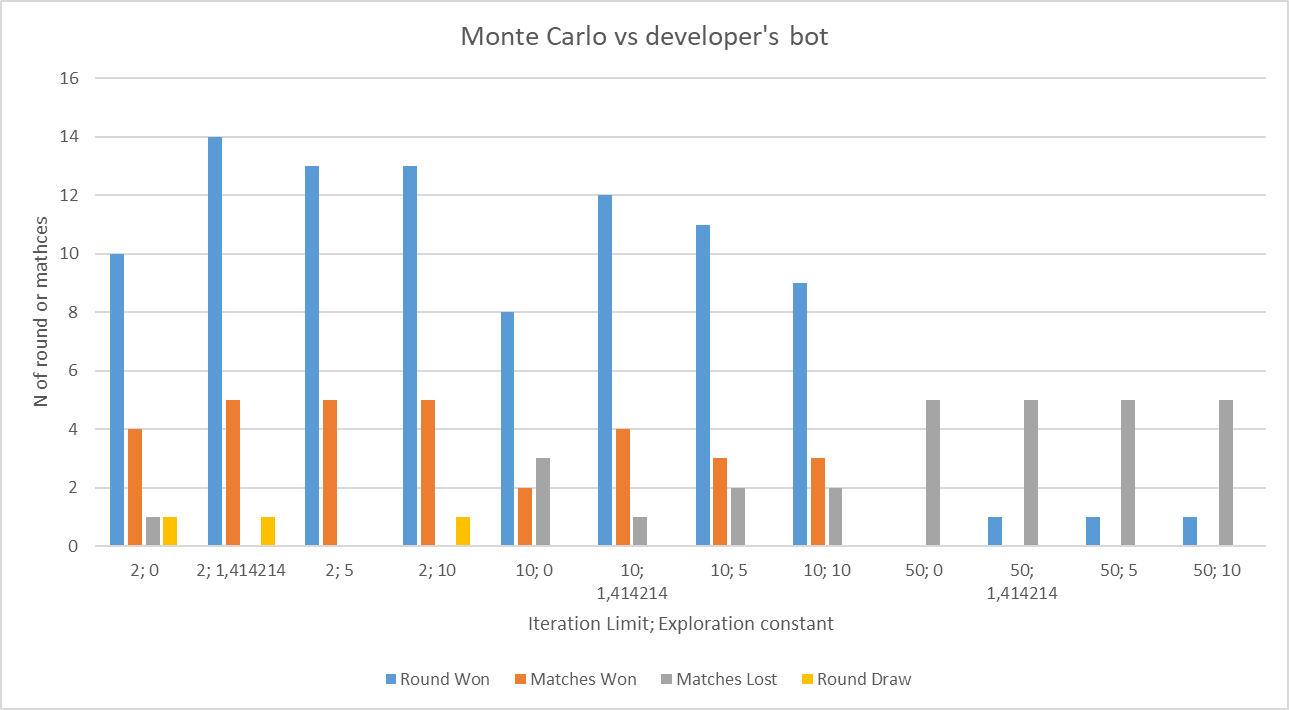

As we can see here the configuration that gives the best score is with depth 2 and c=10. The score is computed calculating the mean per match of this formula:

*   My_HP/(Opp_HP + My_HP) * 1000

in this way we can observe that the configuration with the highest score is more aggressive than the one that have won more rounds than the other. This could be because the algorithm with depth = 2 doesn't have sufficient time to explore a lot of moves, so with an high value for the exploration constant, gives to the model the possibility to explore more useful moves. But if we increase the depth we can observe that the algorithm doesn't have enough time to execute the best move. So it gives bad scores.


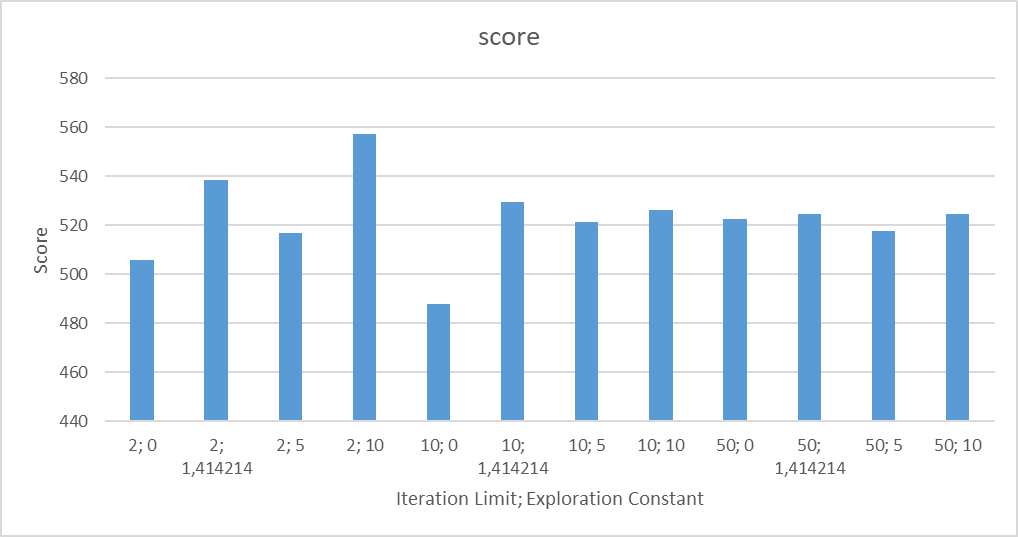

## Conclusion

The development and observation of the bots' behavior provided valuable insights into the application of probabilistic and logical reasoning in a dynamic gaming environment. A notable limitation of the current approach is the absence of parameter learning for dynamic adaptation to opponent strategies, a capability that could potentially be achieved through reinforcement learning techniques.

The Problog agent demonstrated significantly superior performance compared to the other bots in the study. However, its reliance on a single, albeit effective, strategy may present a vulnerability. Opponents could potentially exploit this predictability by developing counter-strategies, thereby fostering a more competitive environment. While this tactic proved successful against the three evaluated bots, further investigation is warranted to assess its robustness against a wider range of opponents and playing styles.
Howere, the probabilistic agent is strong, is responsive and the experiments suggest that is addaptive to different bots.\
The development process presented significant complexities. It necessitated a comprehensive understanding of the game mechanics and the construction of a knowledge base that maintained computational tractability. Furthermore, the relative immaturity and infrequent updates of the chosen probabilistic programming language (ProbLog) introduced unexpected behaviors and challenges, potentially hindering the development of robust and functional programs. Despite the aforementioned limitations, ProbLog offered a framework for representing and reasoning with uncertainty in a real time FightingICE setting.  The ability to integrate probabilistic inference with logical rules proved crucial during agent decision under conditions of incomplete information.\
Future development could focus on enhancing the agent's action selection strategy by diversifying the range of inferred actions while maintaining a high damage output and winning rate. This could involve incorporating a mechanism to select the optimal action based on the predicted opponent state. Additionally, dynamically adjusting action probabilities by analyzing opponent behavior could enable the agent to adapt more effectively and counteract with a more diverse set of actions. Furthermore, the agent's adaptability could be significantly enhanced by incorporating an online learning mechanism to dynamically adjust action probabilities. This could involve continuously monitoring opponent actions and updating the probabilities of different actions based on their observed frequency and effectiveness. Such an approach would enable the agent to evolve its strategy in response to opponent behavior, potentially leading to more robust and unpredictable gameplay. For example, if the opponent frequently uses a jumping attack, the agent could increase the probability of selecting anti-air countermeasures.

As observed before, the Monte Carlo agent can win against the mcts of the developers, but it's crushed by the other algorithms shown here. A way to improve this algorithm could be to shuffle the possible actions, or define the possible actions according different parameters. For this project we observed that with low depth, in order to obtain high scores, the algorithm should have an high value for the exploration constant. This cold be caused by the function provided by *monte-carlo-tree-search* module, because we observed that with low depth the random policy described in the algorithm (choose randomly an action beetween all possible actions) doesn't work properly, so it could be a possible solution to shuffle the possible_action list. Another possible approach useful to improve this model could be introduce the guard action as an advantage in some cases.

## Project Files Overview



### Prolog Agent Implementation
- `prolog_based/prolog_agent_simo/PrologAI.py`: Main Prolog agent implementation using pyswip for Prolog integration
- `prolog_based/prolog_agent_simo/kb.pl`: Prolog knowledge base containing rules for strategic decision making

### Problog Agent Implementation
- `prolog_based/problog_agent_ole/ProblogAgent.py`: Main Problog agent using probabilistic logic programming
- `prolog_based/problog_agent_ole/terms.py`: Defines terms and predicates for probabilistic reasoning
- `prolog_based/problog_agent_ole/KB_V1.pl`: ProbLog knowledge base with probabilistic rules

### Monte Carlo Tree Search Implementation
- `monte_carlo_tree_search/MctsAi.py`: Main MCTS agent implementation
- `monte_carlo_tree_search/FighterState.py`: State representation and action handling for MCTS

### Shell Scripts and Automation
- `run_prolog_agent.sh`: Bash script for running the Prolog agent against the game environment
- `run_py_ag_parallel.sh`: Script for running multiple Python agents in parallel with configurable executions
- `monitor_restart.sh`: Monitoring script that watches for file changes and automatically restarts agents
- `common.sh`: Common utilities and functions shared between shell scripts

### Testing and Evaluation
- `stats_k=*/`: Directory containing test results and statistics for ProbLog agent
- `results_k=*.ipynb`: Jupyter notebooks for analyzing and visualizing Problog agent performance

### Documentation
- `README.md`: Project documentation and setup instructions
- `run_py_ag.md`: Instructions for running Python agents against the game environment
- `monitor_restart.md`: Guide for monitoring and restarting agents on file changes
- `run_py_ag_parallel.md`: Guide for running Python agents in parallel against the game environment


## Bots Demostration


---



The behavior of the ProBlog-powered agent can be observed through the video demonstration. Alternatively, the agent's performance can be directly assessed by executing the provided below code within a suitable environment.


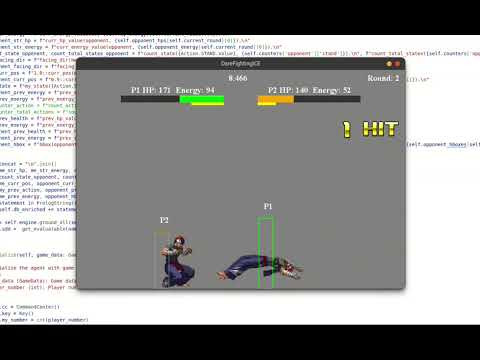

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("jZWkcEtS3o0")

**Execution Environment:**


Please note that executing the provided code within Google Colab may result in significantly slower performance compared to a local Linux-based environment. This is particularly relevant for the Problog agent. For optimal performance, consider running the code locally on a Linux system if available.

### Downloading and installing necessary filies


---


In [ ]:
import os
from pathlib import Path

current_directory = os.getcwd()

In [ ]:

basename = os.path.basename(os.getcwd())
if basename != 'AIF-project-24-25':
  print("Trying to change working directory to 'AIF-project-24-25'")
  os.chdir(current_directory)
current_directory = os.getcwd()
downloaded = (Path(current_directory) / 'AIF-project-24-25').exists()

install_java = True # if the game doesn't start because of java version installed, set to True

if not downloaded:
  !apt-get install -y swi-prolog

  if install_java:
    !apt-get install -y openjdk-21-jdk
    !update-alternatives --install "/usr/bin/java" "java" "/usr/lib/jvm/openjdk-21-jdk-amd64/bin/java" 1
    !update-alternatives --install "/usr/bin/javac" "javac" "/usr/lib/jvm/openjdk-21-jdk-amd64/bin/javac" 1
    !update-alternatives --install "/usr/bin/jar" "jar" "/usr/lib/jvm/openjdk-21-jdk-amd64/bin/jar" 1
    !update-alternatives --auto java
    !update-alternatives --auto javac
    !update-alternatives --auto jar
  !java -version
  if not os.path.exists('AIF-project-24-25'):
    !git clone https://github.com/lesi-nedo/AIF-project-24-25.git


%cd AIF-project-24-25
!git pull
!pip install -r requirements.txt


Trying to change working directory to 'AIF-project-24-25'
/content/AIF-project-24-25
Already up to date.


### Game Running


In [ ]:
import subprocess
import pathlib
import os
from threading import Thread, Event
import select
import sys
import time

# Kill any existing processes
!kill -9 $(ps aux | grep 'compile_run_linux.*' | grep -v grep |  awk '{print $2}')
!kill -9 $(ps aux | grep 'java -cp bin:lib/*' | grep -v grep | awk '{print $2}')
current_directory = os.getcwd()
path_root = os.path.join(current_directory)
basename = os.path.basename(current_directory)
if basename != 'AIF-project-24-25':
  print("Trying to change working directory to 'AIF-project-24-25'")
  os.chdir('AIF-project-24-25')
  path_root = os.path.join(current_directory, "AIF-project-24-25")


TIMEOUT = 5


# Change to the DareFightingICE_CODE directory
os.chdir(pathlib.Path(path_root).absolute() / 'DareFightingICE_CODE')
print(f"Current directory: {os.getcwd()}")

stop_event = Event()
process = None

def capture_output(process):
    """Capture both stdout and stderr from the process"""
    while not stop_event.is_set() and process.poll() is None:
        # Monitor both stdout and stderr
        reads = [process.stdout.fileno(), process.stderr.fileno()]
        ret = select.select(reads, [], [], TIMEOUT)[0]

        if not ret:
            print(f"No output received in {TIMEOUT} seconds")
            continue

        for fd in ret:
            if fd == process.stdout.fileno():
                output = process.stdout.readline()
                if output:
                    print("STDOUT:", output.strip().decode(), flush=True)
            if fd == process.stderr.fileno():
                output = process.stderr.readline()
                if output:
                    print("STDERR:", output.strip().decode(), flush=True)

    return process.poll()

try:
    # Run compile_run_linux.sh with both streams captured
    process = subprocess.Popen(
        ['./compile_run_linux.sh', '--headless'],
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        universal_newlines=False,  # Binary mode
        bufsize=0

    )
    time.sleep(5)

    print(f"Started background process with PID: {process.pid}")

    # # Start output capture thread
    # output_thread = Thread(
    #     target=capture_output,
    #     args=(process,),
    #     daemon=True
    # )
    # output_thread.start()


    # Save PID
    with open(os.path.join(path_root, 'game_process.pid'), 'w') as f:
        f.write(str(process.pid))

except Exception as e:
    print(f"Error: {e}", file=sys.stderr)
    if process and process.poll() is None:
        process.terminate()
finally:
    # Cleanup
    os.chdir(path_root)



kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]
kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]
Current directory: /content/AIF-project-24-25/DareFightingICE_CODE
Started background process with PID: 3053


**Verifying Game Server Status:**

Execute the following cell to confirm the FightingICE game server is running (Try it multiple times).

 If no process is listed, re-run the "Poblog Based Agent" initialization above.

In [ ]:
!ps aux | grep 'java -cp'

root        3123 54.3  0.7 5984056 99940 ?       Sl   12:07   0:01 java -cp bin:lib/*:lib/lwjgl/*:li
root        3158  0.0  0.0   6484  2416 ?        S    12:07   0:00 grep java -cp


### Poblog Based Agent Demonstration

---



**Troubleshooting:**
- If you see: `ERROR:pyftg.socket.aio.gateway:Connection refused by server`

- This error typically arises when the Python script is unable to establish a connection with the running game server.
- **Recommended Action:**  Please attempt to re-run the cell. In most cases, the error will resolve itself after a few retries, allowing the connection to be successfully established.
- This behavior often indicates that the game server might not have fully initialized before the Python script attempts to connect. Subsequent execution attempts usually rectify this timing issue.
- If persistent issues are encountered, ensure that the game server is running correctly and that there are no network connectivity problems that might be hindering communication between the script and the server.


---

- If you see: `TypeError: Cannot convert numpy.ndarray to numpy.ndarray`

- Restart the colab session (keep the data) by gointo into `Runtime` -> `Restart Session`.

The code executes a match between the Prolog Agent and the Problog Agent

* **P1** Prolog Based

* **P2** Problog based

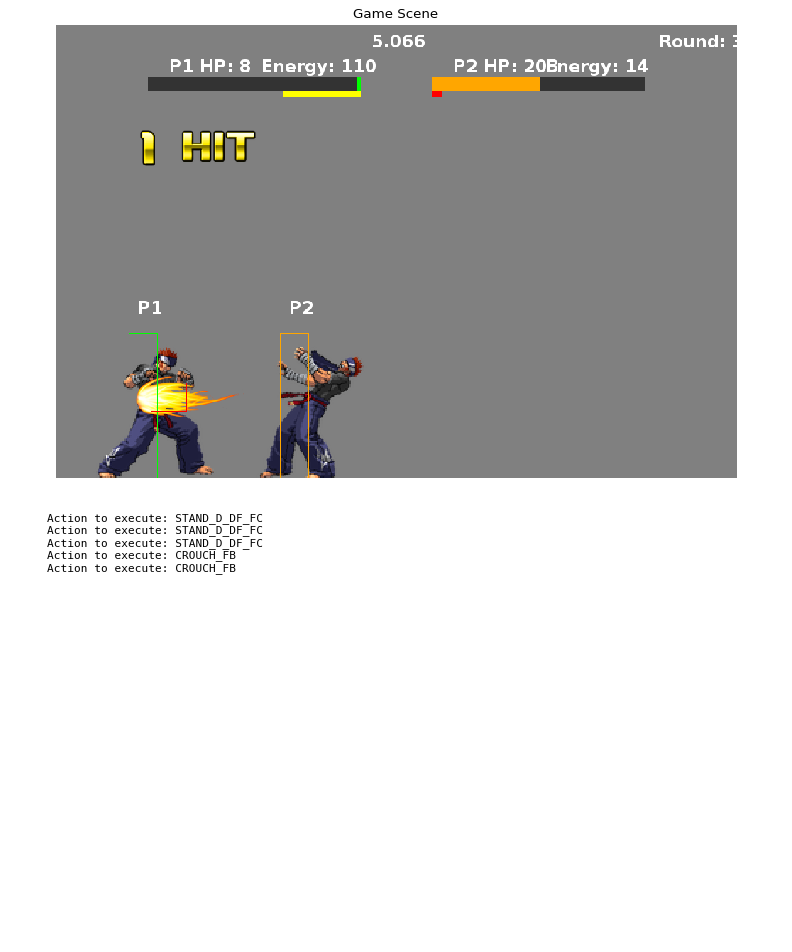

In [ ]:
%matplotlib inline
from pyftg import Key


import keyboard
import time
import os
import sys
import logging
import pathlib
import pandas as pd
logging.getLogger().setLevel(logging.WARNING)


# Change to the DareFightingICE_CODE directory
print(f"Current directory: {os.getcwd()}")
curr_path = os.getcwd()
basename = os.path.basename(os.getcwd())
if basename != 'AIF-project-24-25':
  print("Trying to change working directory to 'AIF-project-24-25'")
  os.chdir('AIF-project-24-25')
  basename = os.path.basename(os.getcwd())
  curr_path = os.getcwd()
  print(f"Current directory: {os.getcwd()}")
  if basename != 'AIF-project-24-25':
    raise Exception("Could not change working directory to 'AIF-project-24-25'")
sys.path.append(curr_path)

from prolog_based.problog_agent_ole.MainGameAgentVsMyAgent import start_process



host='127.0.0.1'
port=31415

await start_process(host=host, port=port, plot_scenes=True, simo_agent=True, echo_actions=True)


### Monte Carlo Tree Search Agent Demonstration

**Important**: If you have already executed the ProbLog cell and stopped prematurely, you'll need to restart the game before running this cell. To do this, go back to the game cell and execute it again.

The code executes a match between the Monte Carlo Search Tree Agent and the Problog Agent

* **P1** Problog Based
* **P2** MCTS Based

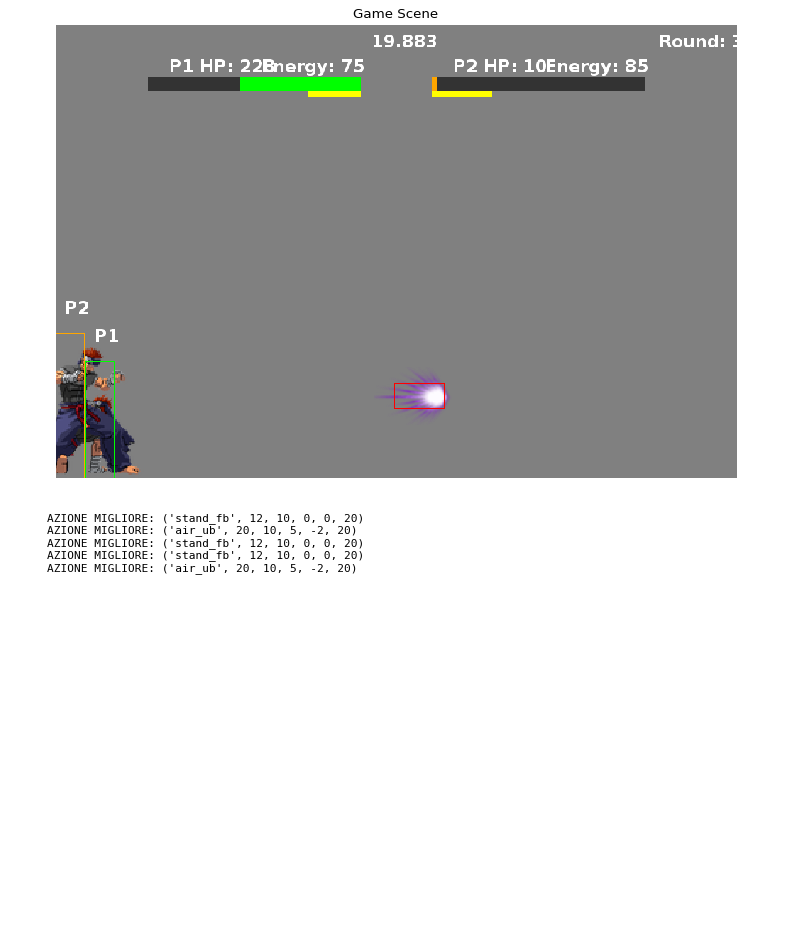

Mean time taken: 0.27142995829675715
 My hp left: 133, Opponent hp left: 0
Mean time taken: 0.25874277445511695
 My hp left: 108, Opponent hp left: 0


In [ ]:
%matplotlib inline
from pyftg import Key

import math
import keyboard
import time
import os
import sys
import logging
import pathlib
logging.getLogger().setLevel(logging.WARNING)

curr_path = os.getcwd()
basename = os.path.basename(os.getcwd())
if basename != 'AIF-project-24-25':
  print("Trying to change working directory to 'AIF-project-24-25'")
  os.chdir('AIF-project-24-25')
  basename = os.path.basename(os.getcwd())
  curr_path = os.getcwd()
  print(f"Current directory: {os.getcwd()}")
  if basename != 'AIF-project-24-25':
    raise Exception("Could not change working directory to 'AIF-project-24-25'")

# Change to the DareFightingICE_CODE directory
print(f"Current directory: {os.getcwd()}")
sys.path.append(os.getcwd())
sys.path.append(os.path.join(os.getcwd(), "monte_carlo_tree_search"))

from monte_carlo_tree_search.MctsAi import MctsAi
from monte_carlo_tree_search.Main_PyAIvsPyAI import start_process



host='127.0.0.1'
port=31415

await start_process(host=host, port=port, plot_scenes=True, exploration_constant = math.sqrt(2), iteration_limit = 3, problog_agent = True, echo_actions=True)

## Bibliography


Inseok Oh, Seungeun Rho, Sangbin Moon, Seongho Son, Hyoil Lee and Jinyun Chung. (2019). Creating [Pro-Level AI for a Real-Time Fighting Game Using Deep Reinforcement Learning]. arXiv preprint arXiv:1904.03821.

Wenzhe Li, Zihan Ding, Seth Karten, and Chi Jin (2024) [FightLadder: A Benchmark for Competitive Multi-Agent Reinforcement Learning]. arXiv preprint arXiv:2406.02081



## Appendix


**Marco Dell'Acqua**:

* MCTS bot creation.

**Oleksiy Nedobiychuk**:

* ProbLog bot creation.
* GitHub repository creation and maintainment throughout the project development.
* Bots deployment and integration into Google Colab

### **[GitHub](https://github.com/lesi-nedo/AIF-project-24-25) repository contribution**:

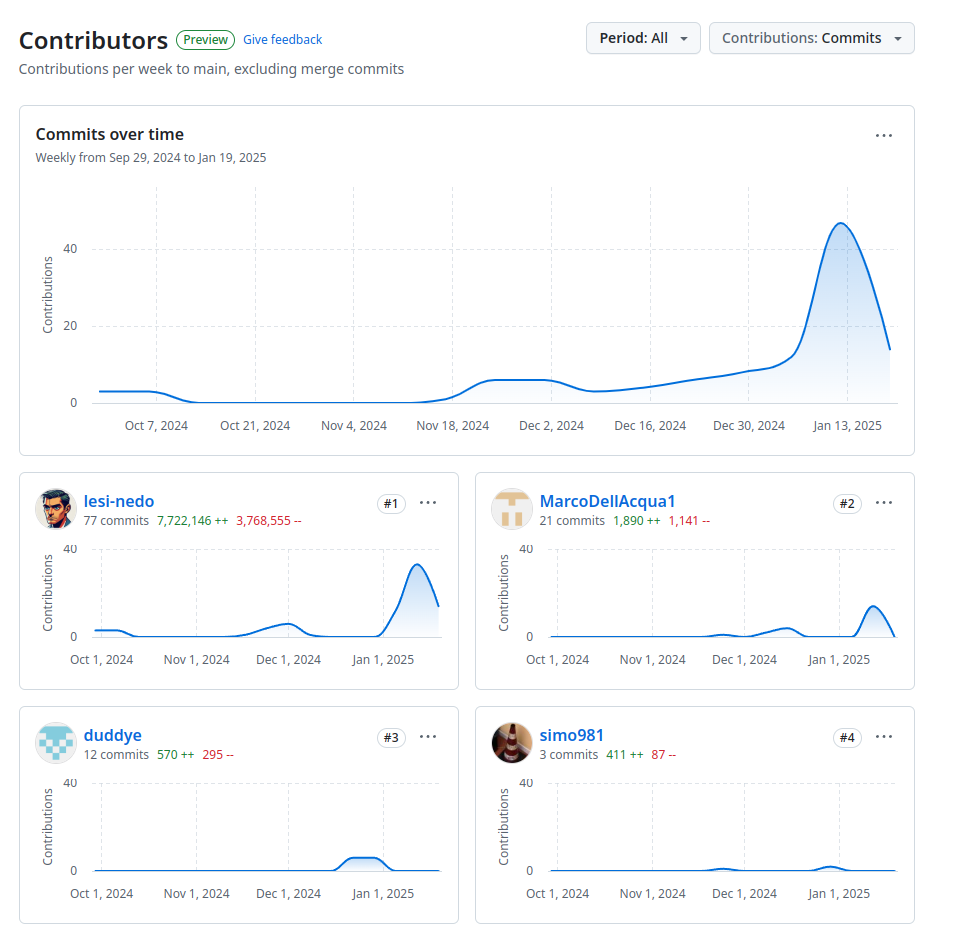